# Submission 2 | Bussines Analytics
## By: Nicxon Nihua (320195), Antony Navarrete, Alejandro Aguirre

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import scatterplotmatrix, heatmap

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb 

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import classification_report, f1_score

import statistics
import statsmodels.api as sm
from scipy.stats import shapiro, ttest_rel, wilcoxon, kstest
from scipy.stats import pointbiserialr, chi2_contingency, chi2


seed = 42

# install required packages typing at terminal: !pip install package_name 

In [ ]:
class Contador():
    '''
    This auxiliar class helps to record information loss from data cleaning
    '''
    def __init__(self, df):
        self.rows = df.shape[0]
        #self.columns = df.shape[1]
        self.perdidas = 0
        self.perdidas_totales  = 0

    def add_perdidas(self, dfnew):
        self.perdidas = self.rows -dfnew.shape[0]
        self.perdidas_totales += self.perdidas
        self.rows = dfnew.shape[0] # update current number of DataFrame records
    
    def reporte(self):
        print('Total number of records :', self.rows + self.perdidas)
        print('Current number of records: ', self.rows)
        print('Lost records:', self.perdidas)
        print('Total number of lost records:', self.perdidas_totales )
        



## 0. UPLOADING DATA

In [3]:
df = pd.read_excel('C:/Users/MyLENOVO/Documents/Repaso_ML_Python/cardiovascular_disease (1).xlsx', 
                   sheet_name='cardiovascular_disease' )

In [4]:
df.head()

General_Health                  Checkup Exercise Heart Disease Skin Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   
2      Very Good     Within the past year      Yes            No          No   
3           Poor     Within the past year      Yes           Yes          No   
4           Good     Within the past year       No            No          No   

  Other Cancer Depression Diabetes Arthritis     Sex Age Category  \
0           No         No       No       Yes  Female        70-74   
1           No         No      Yes        No  Female        70-74   
2           No         No      Yes        No  Female        60-64   
3           No         No      Yes        No    Male        75-79   
4           No         No       No        No    Male          80+   

   Height (cm)  Weight (kg)    BMI Smoking History  Alcohol Consumption  \
0          150        32.66  14.54             Yes                    0   
1          165        77.11  28.29              No                    0   
2          163        88.45  33.47              No                    4   
3          180        93.44  28.73              No                    0   
4          191        88.45  24.37             Yes                    0   

  Fruit Consumption  Green_Vegetables_Consumption  FriedPotato Consumption  
0                30                            16                       12  
1                30                             0                        4  
2                12                             3                       16  
3                30                            30                        8  
4                 8                             4                        0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308753 non-null  object 
 3   Heart Disease                 308854 non-null  object 
 4   Skin Cancer                   308854 non-null  object 
 5   Other Cancer                  308854 non-null  object 
 6   Depression                    305766 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age Category                  308854 non-null  object 
 11  Height (cm)                   308854 non-null  int64  
 12  Weight (kg)                   308854 non-nul

In [6]:
df.columns = df.columns.str.replace(' ', '_') # Rename the columns of our DataFrame

## 1. DATA CLEANING 

### ADRESSING MISSING VALUES

In [7]:
# vamos a analizar y contar los valores nulos de las columnas Exercise y Depression
null_values = df[['Exercise','Depression']].isnull().sum()
print(null_values)
print('Approximate null values ​count ​in the Exercise and Depression columns: ', sum(null_values)) # suma total sin considerar repetidos
print('The percentage of records with null values ​​in relation to the total number of records is: ', 100*sum(null_values)/df.shape[0],'%')


Exercise       101
Depression    3088
dtype: int64
Approximate null values ​count ​in the Exercise and Depression columns:  3189
The percentage of records with null values ​​in relation to the total number of records is:  1.032526695461286 %


### ADRESSING INCORRECT VALUES

In [8]:
# Realizamos una copia del datagrame original para trabajar con seguridad
df_ = df.copy()
print(df_['Heart_Disease'].value_counts())

contador = Contador(df_)

Heart_Disease
No     283882
Yes     24971
e           1
Name: count, dtype: int64


In [9]:
# Delete the records with null values ​​for Exercise and Depression columns
df_.dropna(inplace=True)
df_.reset_index(drop=True, inplace=True)
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305667 entries, 0 to 305666
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                305667 non-null  object 
 1   Checkup                       305667 non-null  object 
 2   Exercise                      305667 non-null  object 
 3   Heart_Disease                 305667 non-null  object 
 4   Skin_Cancer                   305667 non-null  object 
 5   Other_Cancer                  305667 non-null  object 
 6   Depression                    305667 non-null  object 
 7   Diabetes                      305667 non-null  object 
 8   Arthritis                     305667 non-null  object 
 9   Sex                           305667 non-null  object 
 10  Age_Category                  305667 non-null  object 
 11  Height_(cm)                   305667 non-null  int64  
 12  Weight_(kg)                   305667 non-nul

In [10]:
contador.add_perdidas(df_)
contador.reporte()

Total number of records : 308854
Current number of records:  305667
Lost records: 3187
Total number of lost records: 3187


In [11]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [12]:
#Print unique values ​​of the categorical variables
for col in df_.select_dtypes(include=['object']).columns:
    print(col +': ', df_[col].unique())

General_Health:  ['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']
Checkup:  ['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']
Exercise:  ['No' 'Yes']
Heart_Disease:  ['No' 'Yes' 'e']
Skin_Cancer:  ['No' 'Yes' 'dsfg' 'wet' '12*lklñ´fg' 'q345345' 'serter-89' 'dfg 025'
 'dfgklñfg-' 'sertret-8']
Other_Cancer:  ['No' 'Yes' 'dsgw45']
Depression:  ['No' 'Yes']
Diabetes:  ['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy']
Arthritis:  ['Yes' 'No']
Sex:  ['Female' 'Male' 'Non-Binary']
Age_Category:  ['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '35-39' '40-44' '25-29']
Smoking_History:  ['Yes' 'No']
Fruit_Consumption:  [30 12 8 16 2 1 60 0 7 5 3 6 90 28 20 4 80 24 15 10 25 14 120 32 40 17 45
 100 9 99 96 35 50 56 48 27 72 36 84 26 23 18 21 42 22 11 112 29 64 70 33
 76 44 39 75 31 92 104 88 65 55 13 38 63 97 'No' 'Yes' 108 19 52 98 37 68
 34 41 116 54 62 85]


In [13]:
print(df_['Heart_Disease'].unique()) # 'e' typo 
print((df_['Heart_Disease'] =='e').sum())
df_ ['Heart_Disease'] = df_['Heart_Disease'].apply(lambda x: 'No' if x=='No' else 'Yes')
print(df_['Heart_Disease'].unique())
print(df_.shape)

['No' 'Yes' 'e']
1
['No' 'Yes']
(305667, 19)


In [14]:
df_['Fruit_Consumption'].replace({'Yes': -1, 'No': -1}, inplace =True)
print(df_['Fruit_Consumption'].unique()) 
median = df_[df_['Fruit_Consumption'] != -1]['Fruit_Consumption'].quantile(0.5)
print('Mediana de Fruit Consumption: ', median) # median fruit consumption in 30 days
df_['Fruit_Consumption'].replace({-1: int(median)}, inplace = True)
print(df_['Fruit_Consumption'].unique()) 
print(df_.shape)

[ 30  12   8  16   2   1  60   0   7   5   3   6  90  28  20   4  80  24
  15  10  25  14 120  32  40  17  45 100   9  99  96  35  50  56  48  27
  72  36  84  26  23  18  21  42  22  11 112  29  64  70  33  76  44  39
  75  31  92 104  88  65  55  13  38  63  97  -1 108  19  52  98  37  68
  34  41 116  54  62  85]


C:\Users\MyLENOVO\AppData\Local\Temp\ipykernel_9612\3455733108.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_['Fruit_Consumption'].replace({'Yes': -1, 'No': -1}, inplace =True)
C:\Users\MyLENOVO\AppData\Local\Temp\ipykernel_9612\3455733108.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
 

Mediana de Fruit Consumption:  30.0
[ 30  12   8  16   2   1  60   0   7   5   3   6  90  28  20   4  80  24
  15  10  25  14 120  32  40  17  45 100   9  99  96  35  50  56  48  27
  72  36  84  26  23  18  21  42  22  11 112  29  64  70  33  76  44  39
  75  31  92 104  88  65  55  13  38  63  97 108  19  52  98  37  68  34
  41 116  54  62  85]
(305667, 19)


In [15]:
# Some records with incorrect entries in the Skin Cancer and Other Cancer column.
df_[['Skin_Cancer', 'Other_Cancer']] = df_[['Skin_Cancer', 'Other_Cancer']].map(lambda x: 'Yes' if x =='Yes' else 'No' if x =='No' else np.nan)
df_.dropna(inplace=True)
df_.shape

(305657, 19)

In [16]:
contador.add_perdidas(df_)
contador.reporte()

Total number of records : 305667
Current number of records:  305657
Lost records: 10
Total number of lost records: 3197


In [17]:
# Checking previous operations 
for col in df_.select_dtypes(include=['object']).columns:
    print(col +': ', df_[col].unique())
# Reset index
df_.reset_index(drop=True, inplace=True)

General_Health:  ['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']
Checkup:  ['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']
Exercise:  ['No' 'Yes']
Heart_Disease:  ['No' 'Yes']
Skin_Cancer:  ['No' 'Yes']
Other_Cancer:  ['No' 'Yes']
Depression:  ['No' 'Yes']
Diabetes:  ['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy']
Arthritis:  ['Yes' 'No']
Sex:  ['Female' 'Male' 'Non-Binary']
Age_Category:  ['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '35-39' '40-44' '25-29']
Smoking_History:  ['Yes' 'No']


In [18]:
# Getting the categorical and numerical variables

numeric_cols =  df_.select_dtypes(include=[np.number]).columns
categoric_cols = df_.select_dtypes(include=['object']).columns
categoric_cols = categoric_cols[categoric_cols !='Heart_Disease'] # drop target variable

print('Columnas categoricas: ', categoric_cols)
print('Columnas numericas: ', numeric_cols)


Columnas categoricas:  Index(['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer',
       'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category',
       'Smoking_History'],
      dtype='object')
Columnas numericas:  Index(['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption',
       'FriedPotato_Consumption'],
      dtype='object')


# 2. HANDLING OUTLIERS 

In [19]:
df_numeric = df_[numeric_cols].copy()
print(df_['Heart_Disease'].value_counts())

Heart_Disease
No     280933
Yes     24724
Name: count, dtype: int64


In [20]:
def data_plot(kind,df,savefig=False, kde=False, density=False, num_fig=1, dpi=300, bins=30):
    if kind == 'hist':
        # Create subplots for each column
        fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 15))

        # plot a histogram on each subplot
        for i, column in enumerate(df.columns):
            row = i // 2 # row index
            col = i % 2 # column index
            df[column].plot(kind='hist', density=density, 
                            bins=bins, ax=axes[row, col], 
                            title=f'{column} Distribution', color='red')
            if kde:
                sns.kdeplot(df[column], color='black', ax=axes[row, col], 
                            label='kernel density estimation (KDE)')# add density curve using seaborn
            axes[row, col].set_xlabel(column)
            axes[row, col].set_ylabel("Count")
            axes[row, col].set_yscale('log')
            axes[row, col].legend()

        # hide unused axes
        for j in range(i + 1, 8):
            fig.delaxes(axes[j // 2, j % 2])  # remove unused subplots

    elif kind ==  'box':
        df.plot(kind='box', subplots=True, sharex=False, 
                sharey=False, layout=(1,8), figsize=(20, 8), color='red')
    elif kind =='scattermatrix':
        num_vars = len(df.columns)

        fig, axes = plt.subplots(nrows=num_vars, ncols=num_vars, figsize=(25,25))

        for i in range(num_vars):
            for j in range(num_vars):
                ax = axes[i, j]
                
                if i > j:  # plotting only non-diagonal scatterplots
                    ax.scatter(df.iloc[:, j], df.iloc[:, i], color='red', alpha=0.25, s=5)
                else:
                    ax.axis('off')  
                # x and y labels    
                if i == num_vars - 1:  
                    ax.set_xlabel(df.columns[j])
                
                if j == 0:  
                    ax.set_ylabel(df.columns[i])
    plt.tight_layout()
    if savefig:
        # Save fig
        name = f'figura00{num_fig}'
        file_name = f"{name}.png"
        plt.savefig(file_name, dpi=dpi, format='png', bbox_inches="tight")

    plt.show()

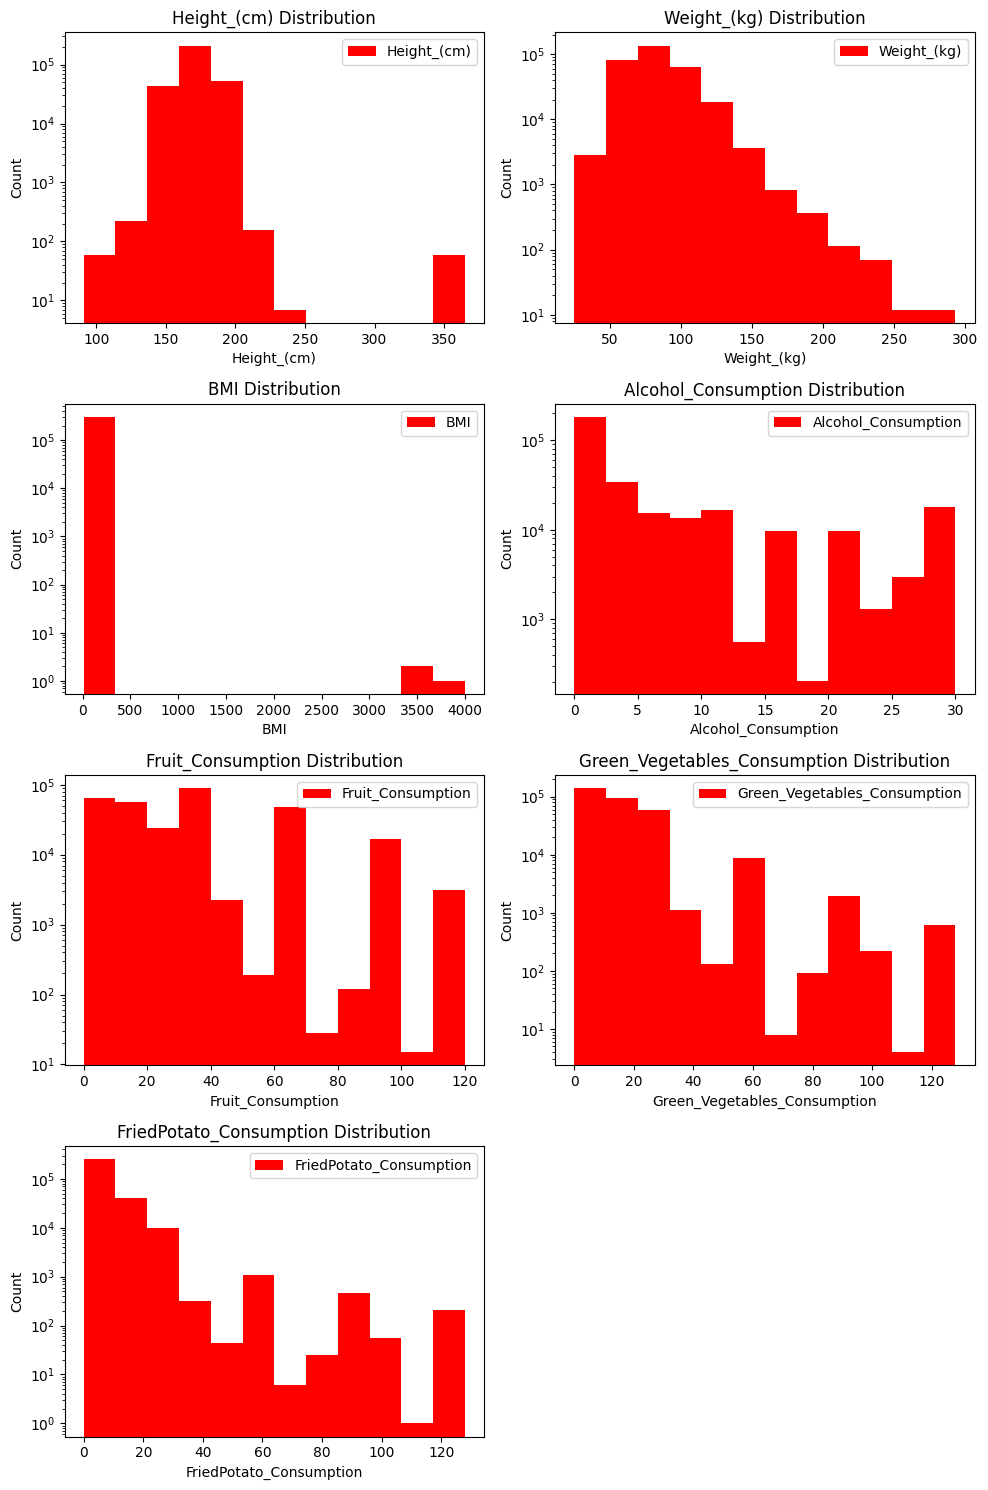

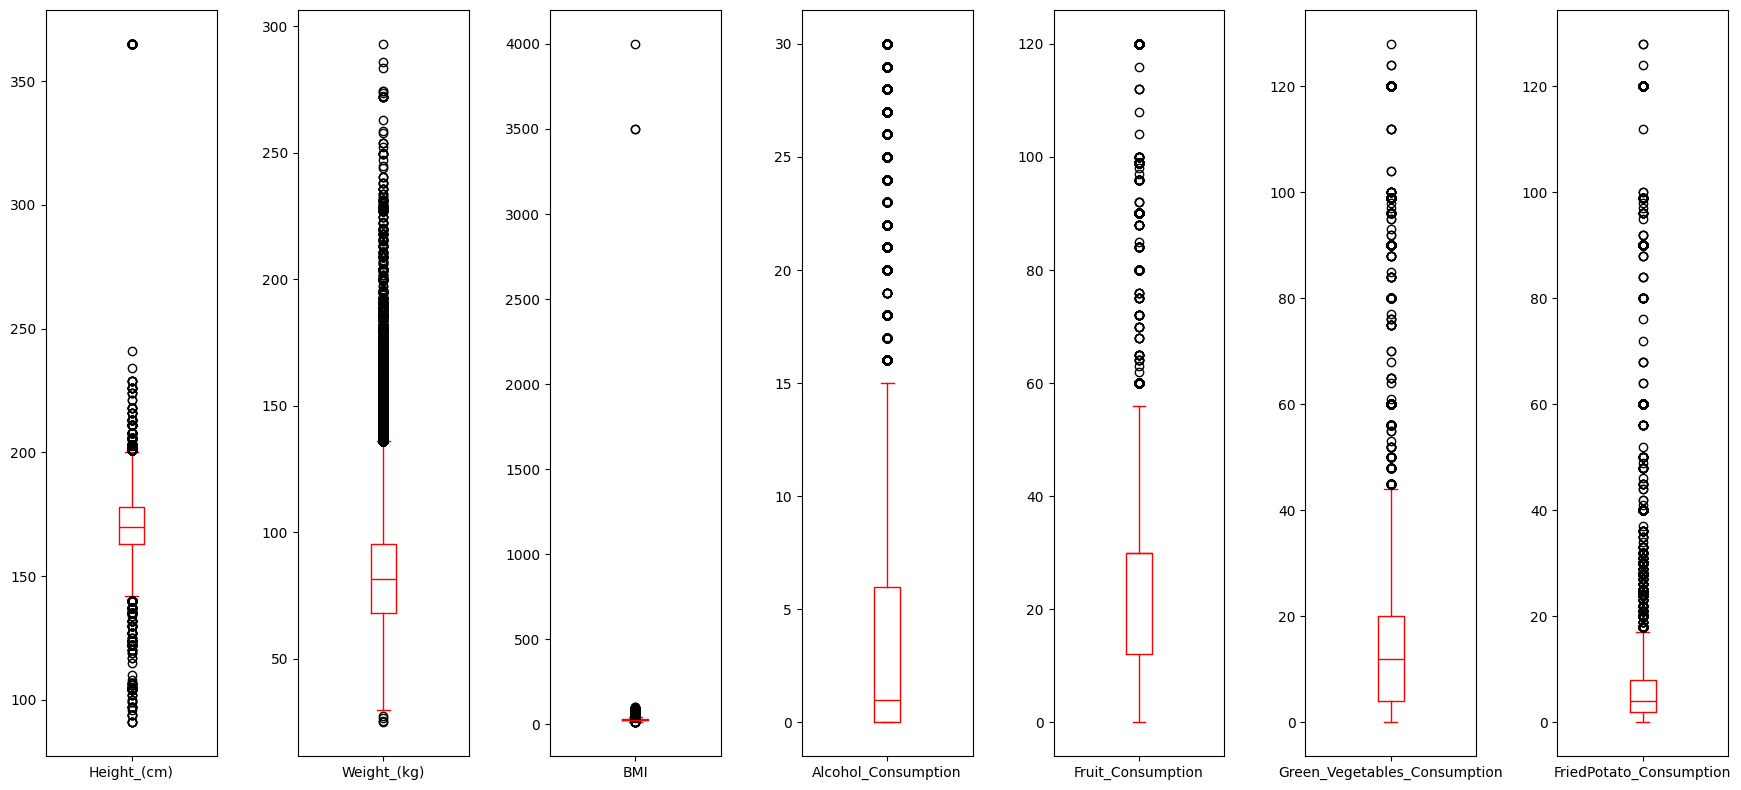

In [21]:
data_plot('hist',df_numeric,savefig=True, bins=12, num_fig=1)
data_plot('box',df_numeric,savefig=True, num_fig=2)

In [22]:
# Function to perform Kolmogorov-Smirnov test
def normality_tests(df):
    p_values_ks = []  # List to store p-values for K-S test
    statistics_ks = []  # List to store statistics for K-S test
    
    for column in df.columns: 
        # Perform Kolmogorov-Smirnov test for normality
        stat_ks, p_value_ks = kstest(df[column], 'norm')
        statistics_ks.append(stat_ks)
        p_values_ks.append(p_value_ks)
    
    # Create DataFrame with results
    results_df = pd.DataFrame({
        'K-S P-Value': p_values_ks,
        'K-S Statistic': statistics_ks
    }, index=df.columns)  # Index by column names

    return results_df

# Run the tests and get results
test_results = normality_tests(df_numeric)

# Display the results
print(test_results.to_latex(index=True))
test_results


\begin{tabular}{lrr}
\toprule
 & K-S P-Value & K-S Statistic \\
\midrule
Height_(cm) & 0.000000 & 1.000000 \\
Weight_(kg) & 0.000000 & 1.000000 \\
BMI & 0.000000 & 1.000000 \\
Alcohol_Consumption & 0.000000 & 0.500000 \\
Fruit_Consumption & 0.000000 & 0.942074 \\
Green_Vegetables_Consumption & 0.000000 & 0.880403 \\
FriedPotato_Consumption & 0.000000 & 0.737340 \\
\bottomrule
\end{tabular}



K-S P-Value  K-S Statistic
Height_(cm)                           0.0       1.000000
Weight_(kg)                           0.0       1.000000
BMI                                   0.0       1.000000
Alcohol_Consumption                   0.0       0.500000
Fruit_Consumption                     0.0       0.942074
Green_Vegetables_Consumption          0.0       0.880403
FriedPotato_Consumption               0.0       0.737340

In [23]:
from sklearn.ensemble import IsolationForest

# Initialization Isolation Forest
iso_forest = IsolationForest(contamination=0.36, 
                             n_estimators=200, 
                             n_jobs=-1, # use all disponible threads
                             random_state=seed) 
# Fit the model 
outliers = iso_forest.fit_predict(df_numeric)

# -1 is for data with outliers
# filter only normal points
df_numeric_cleaned = df_numeric[outliers == 1]

In [24]:
df_numeric_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195620 entries, 1 to 305656
Data columns (total 7 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Height_(cm)                   195620 non-null  int64  
 1   Weight_(kg)                   195620 non-null  float64
 2   BMI                           195620 non-null  float64
 3   Alcohol_Consumption           195620 non-null  int64  
 4   Fruit_Consumption             195620 non-null  int64  
 5   Green_Vegetables_Consumption  195620 non-null  int64  
 6   FriedPotato_Consumption       195620 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 11.9 MB


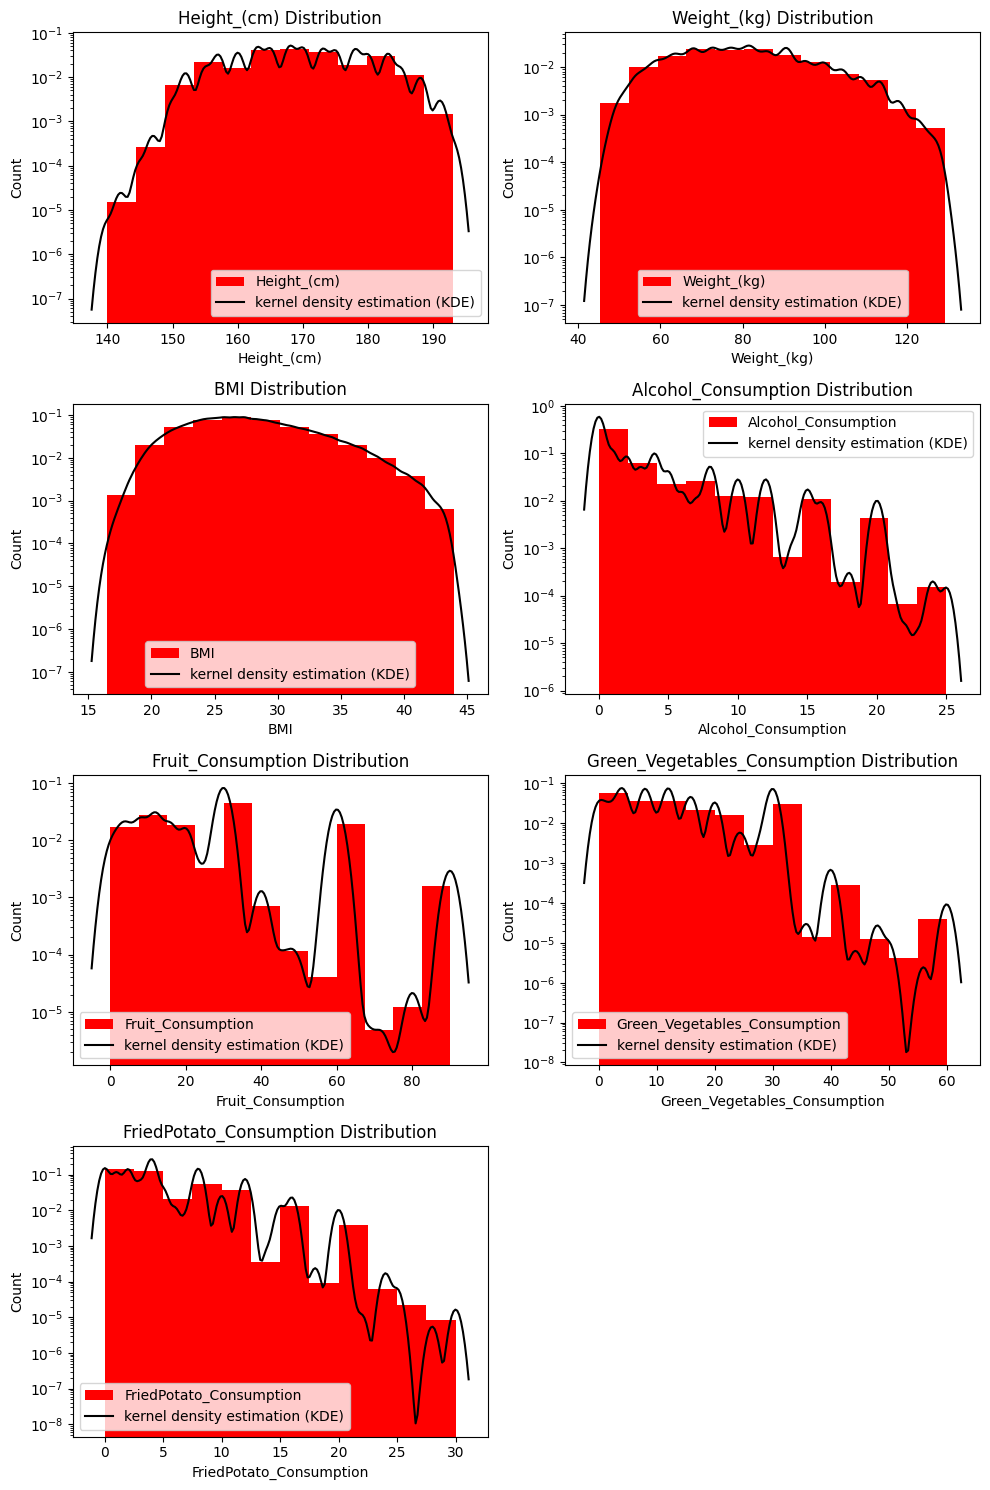

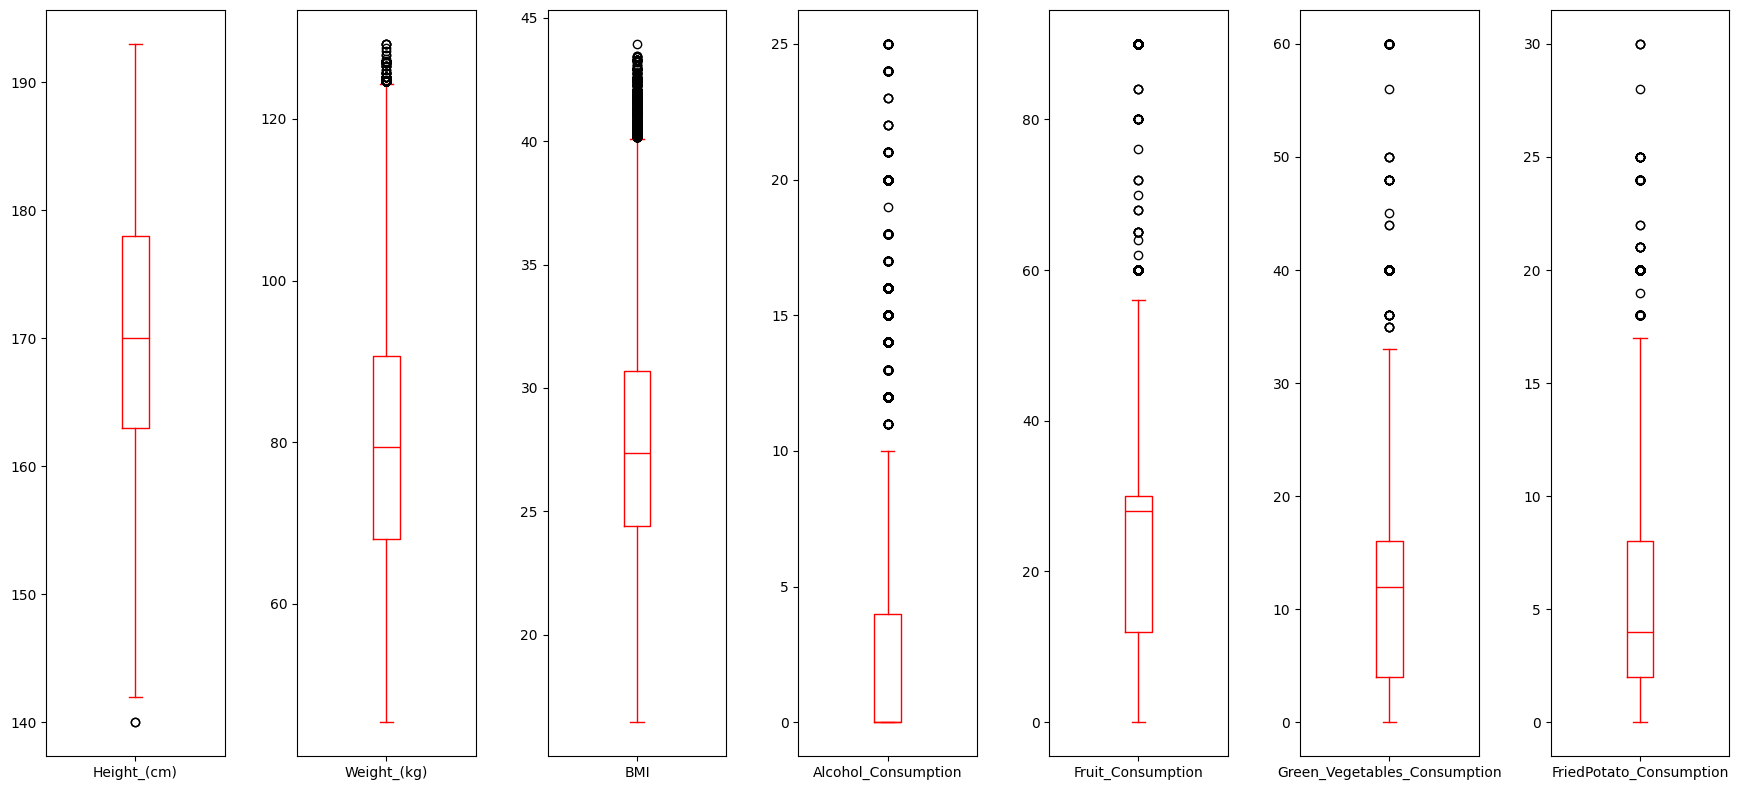

In [25]:
data_plot('hist',df_numeric_cleaned,savefig=True, density=True, kde=True, num_fig=3, bins=12)
data_plot('box',df_numeric_cleaned,savefig=True, num_fig=4)

### L2 Normalization

In [26]:
# target values to create cleaned data scatterplots by class
y_df = df_.iloc[df_numeric_cleaned.index.values, 3].values
y_df = pd.DataFrame(y_df,index=df_numeric_cleaned.index)
y1_df_index = y_df[y_df == 'Yes'].index.values
y0_df_index = y_df[y_df == 'No'].index.values

In [27]:
def Radial_Scaler(data):
    ''''
    L2 normalizaion function
    '''
    sqr_norm = 1
    for i in data.index:
        sqr_norm = (data.loc[i,:].values**2).sum()
        if sqr_norm != 0:
            data.loc[i, :] = data.loc[i, :] / sqr_norm
    
    return data


In [28]:
# Radial transformation data: 
scaler = StandardScaler()
df_numeric_std = scaler.fit_transform(df_numeric)
df_numeric_ = pd.DataFrame(df_numeric_std, columns = df_numeric.columns, index = df_numeric.index)
df_numeric_ = Radial_Scaler(df_numeric_) # take 1m and 21 sec
df_numeric_.head()

Height_(cm)  Weight_(kg)       BMI  Alcohol_Consumption  Fruit_Consumption  \
0    -0.167715    -0.212969 -0.095719            -0.055485           0.000615   
1    -0.279525    -0.165176 -0.016071            -0.337875           0.003745   
2    -0.221880     0.072434  0.115775            -0.042620          -0.228504   
3     0.360824     0.195603  0.001613            -0.263738           0.002923   
4     0.317319     0.038959 -0.056027            -0.106551          -0.150477   

   Green_Vegetables_Consumption  FriedPotato_Consumption  
0                      0.005344                 0.059365  
1                     -0.550126                -0.145501  
2                     -0.258494                 0.360591  
3                      0.423365                 0.084305  
4                     -0.127549                -0.125829

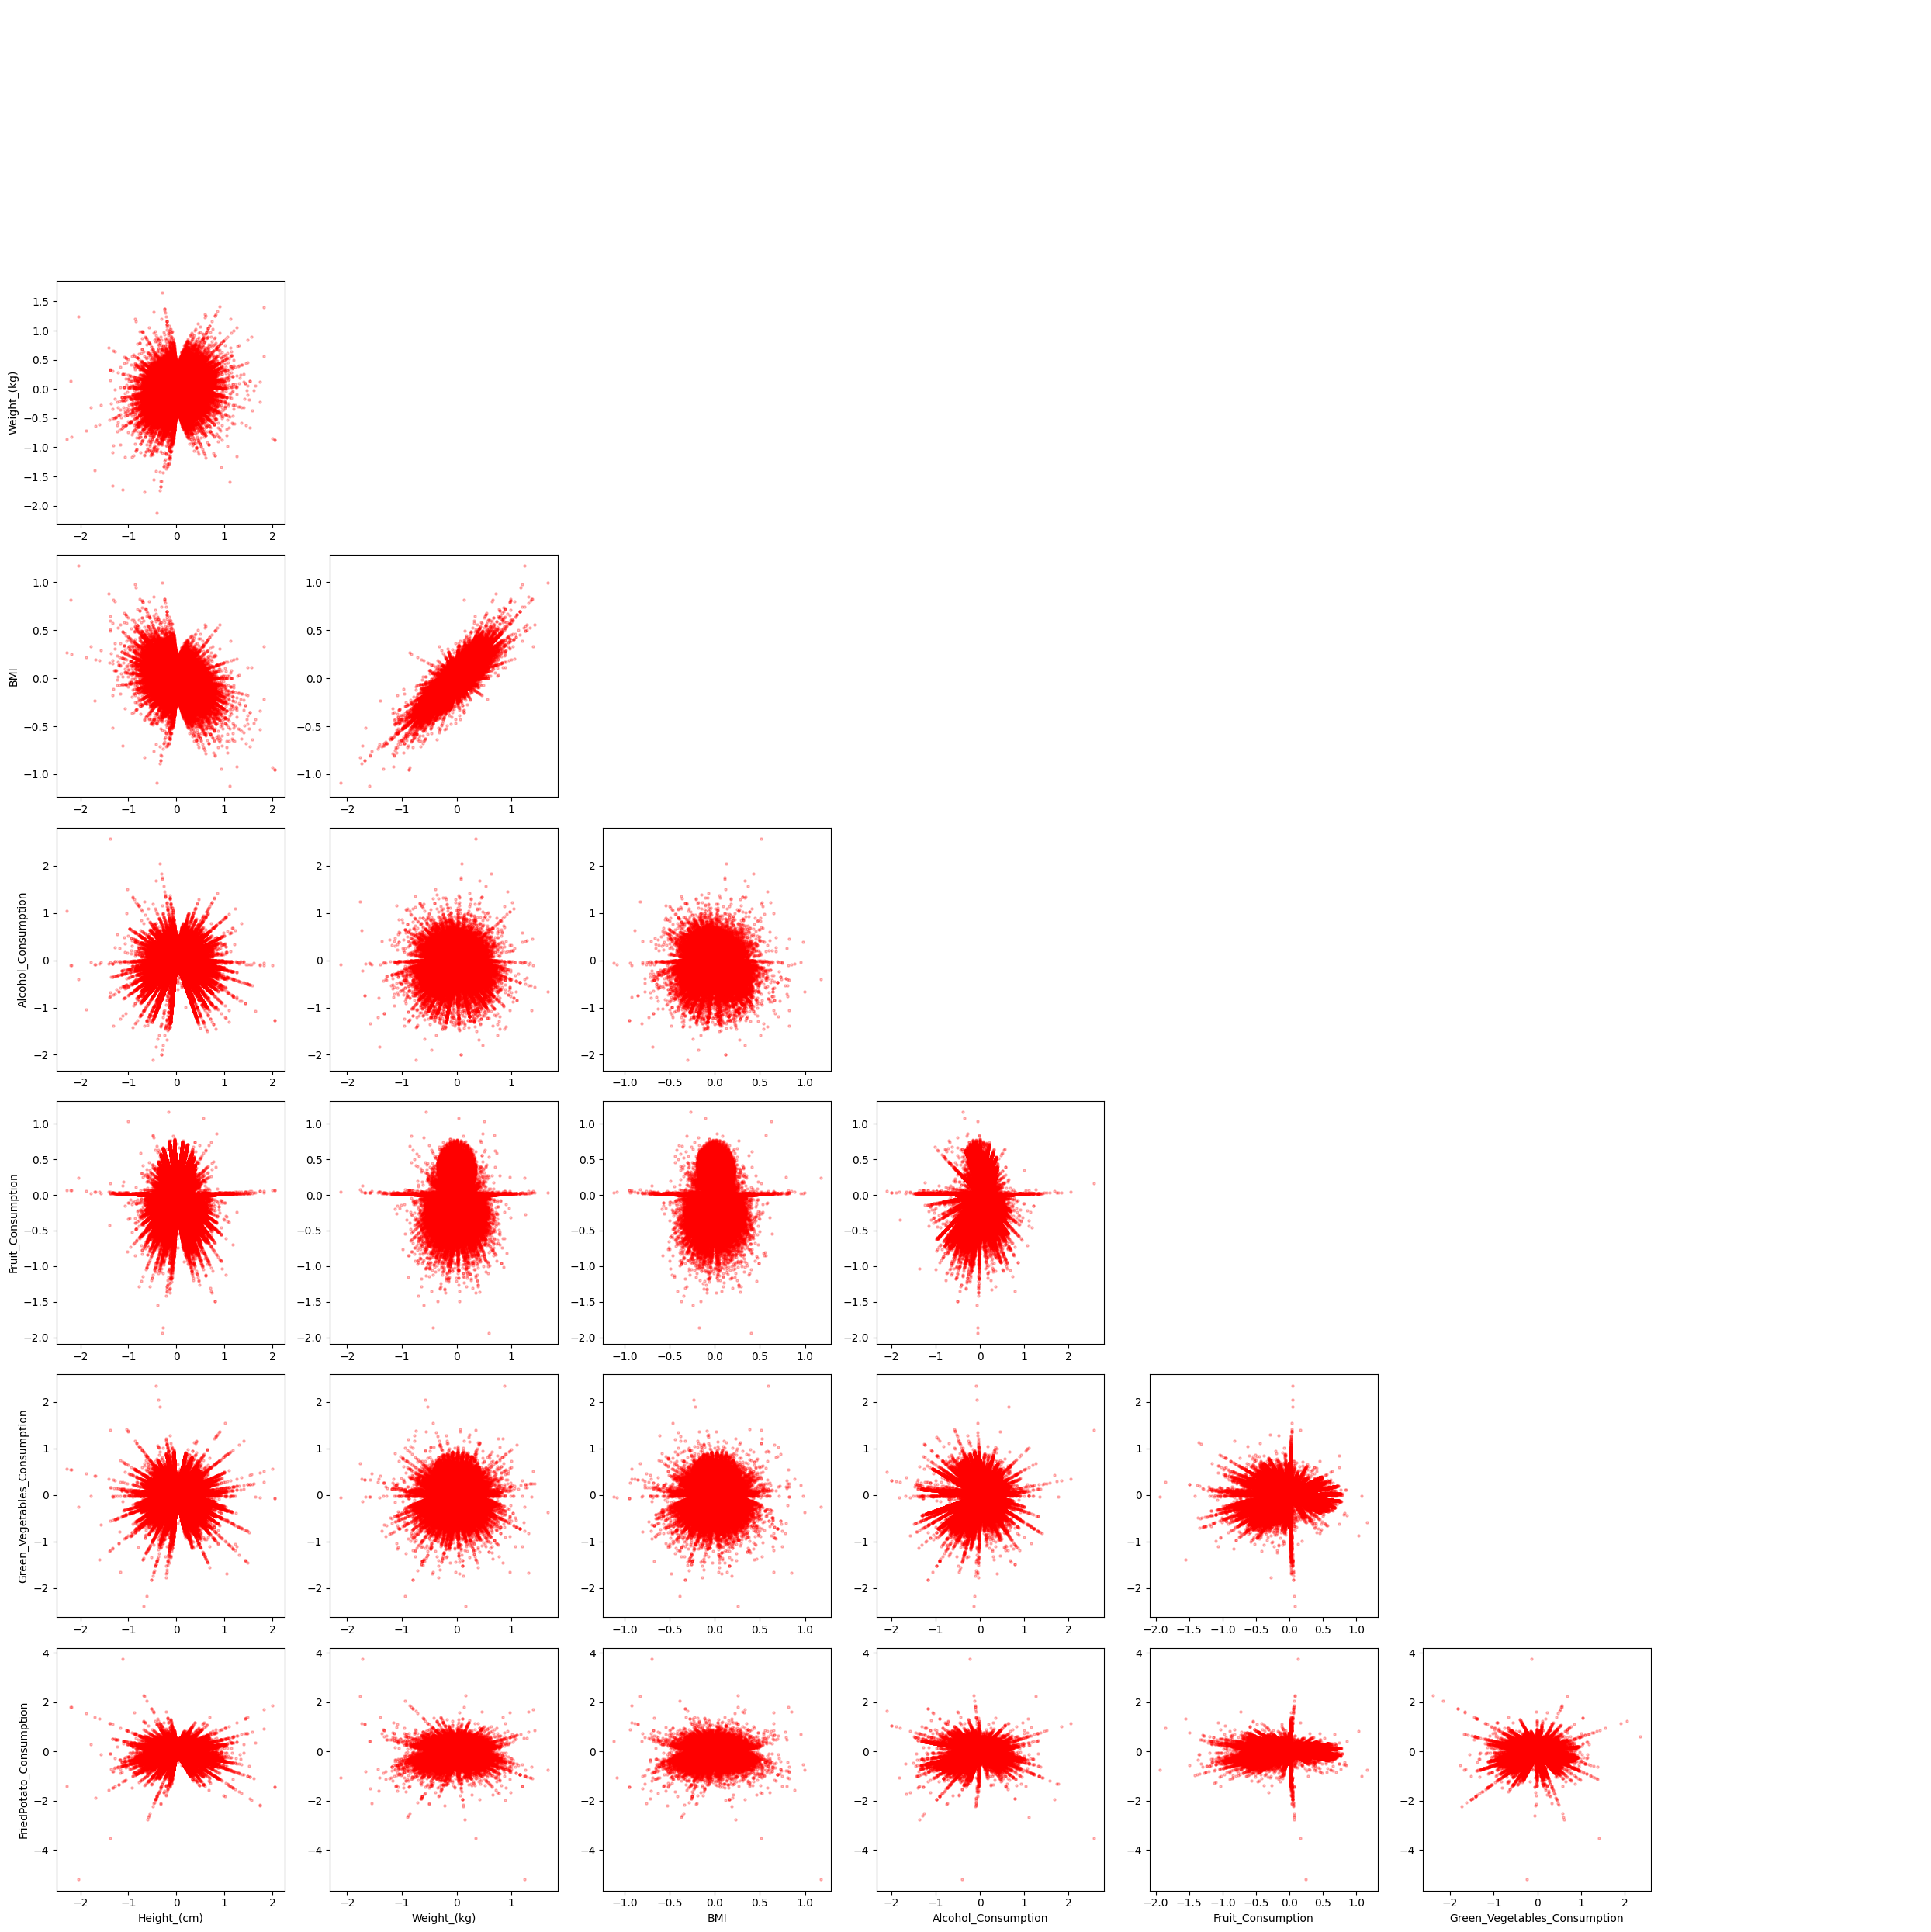

In [29]:
data_plot('scattermatrix', df_numeric_,savefig=True, num_fig=5)

In [30]:
scaler = StandardScaler()
df_numeric_cleaned_std = scaler.fit_transform(df_numeric_cleaned)
df_numeric_cleaned_ = pd.DataFrame(df_numeric_cleaned_std, columns = df_numeric_cleaned.columns, 
                                   index = df_numeric_cleaned.index)
df_numeric_cleaned_ = Radial_Scaler(df_numeric_cleaned_)
df_numeric_cleaned_.head()

Height_(cm)  Weight_(kg)       BMI  Alcohol_Consumption  Fruit_Consumption  \
1    -0.209297    -0.082646  0.045908            -0.247005           0.090099   
2    -0.066586     0.048616  0.112994             0.032728          -0.065174   
3     0.172083     0.137151  0.033447            -0.097697           0.035637   
4     0.243113     0.057735 -0.079946            -0.066163          -0.099963   
6     0.134239    -0.166701 -0.269143            -0.150525          -0.124756   

   Green_Vegetables_Consumption  FriedPotato_Consumption  
1                     -0.519116                -0.065771  
2                     -0.089111                 0.237533  
3                      0.285277                 0.121503  
4                     -0.094751                -0.117519  
6                     -0.114780                -0.267363

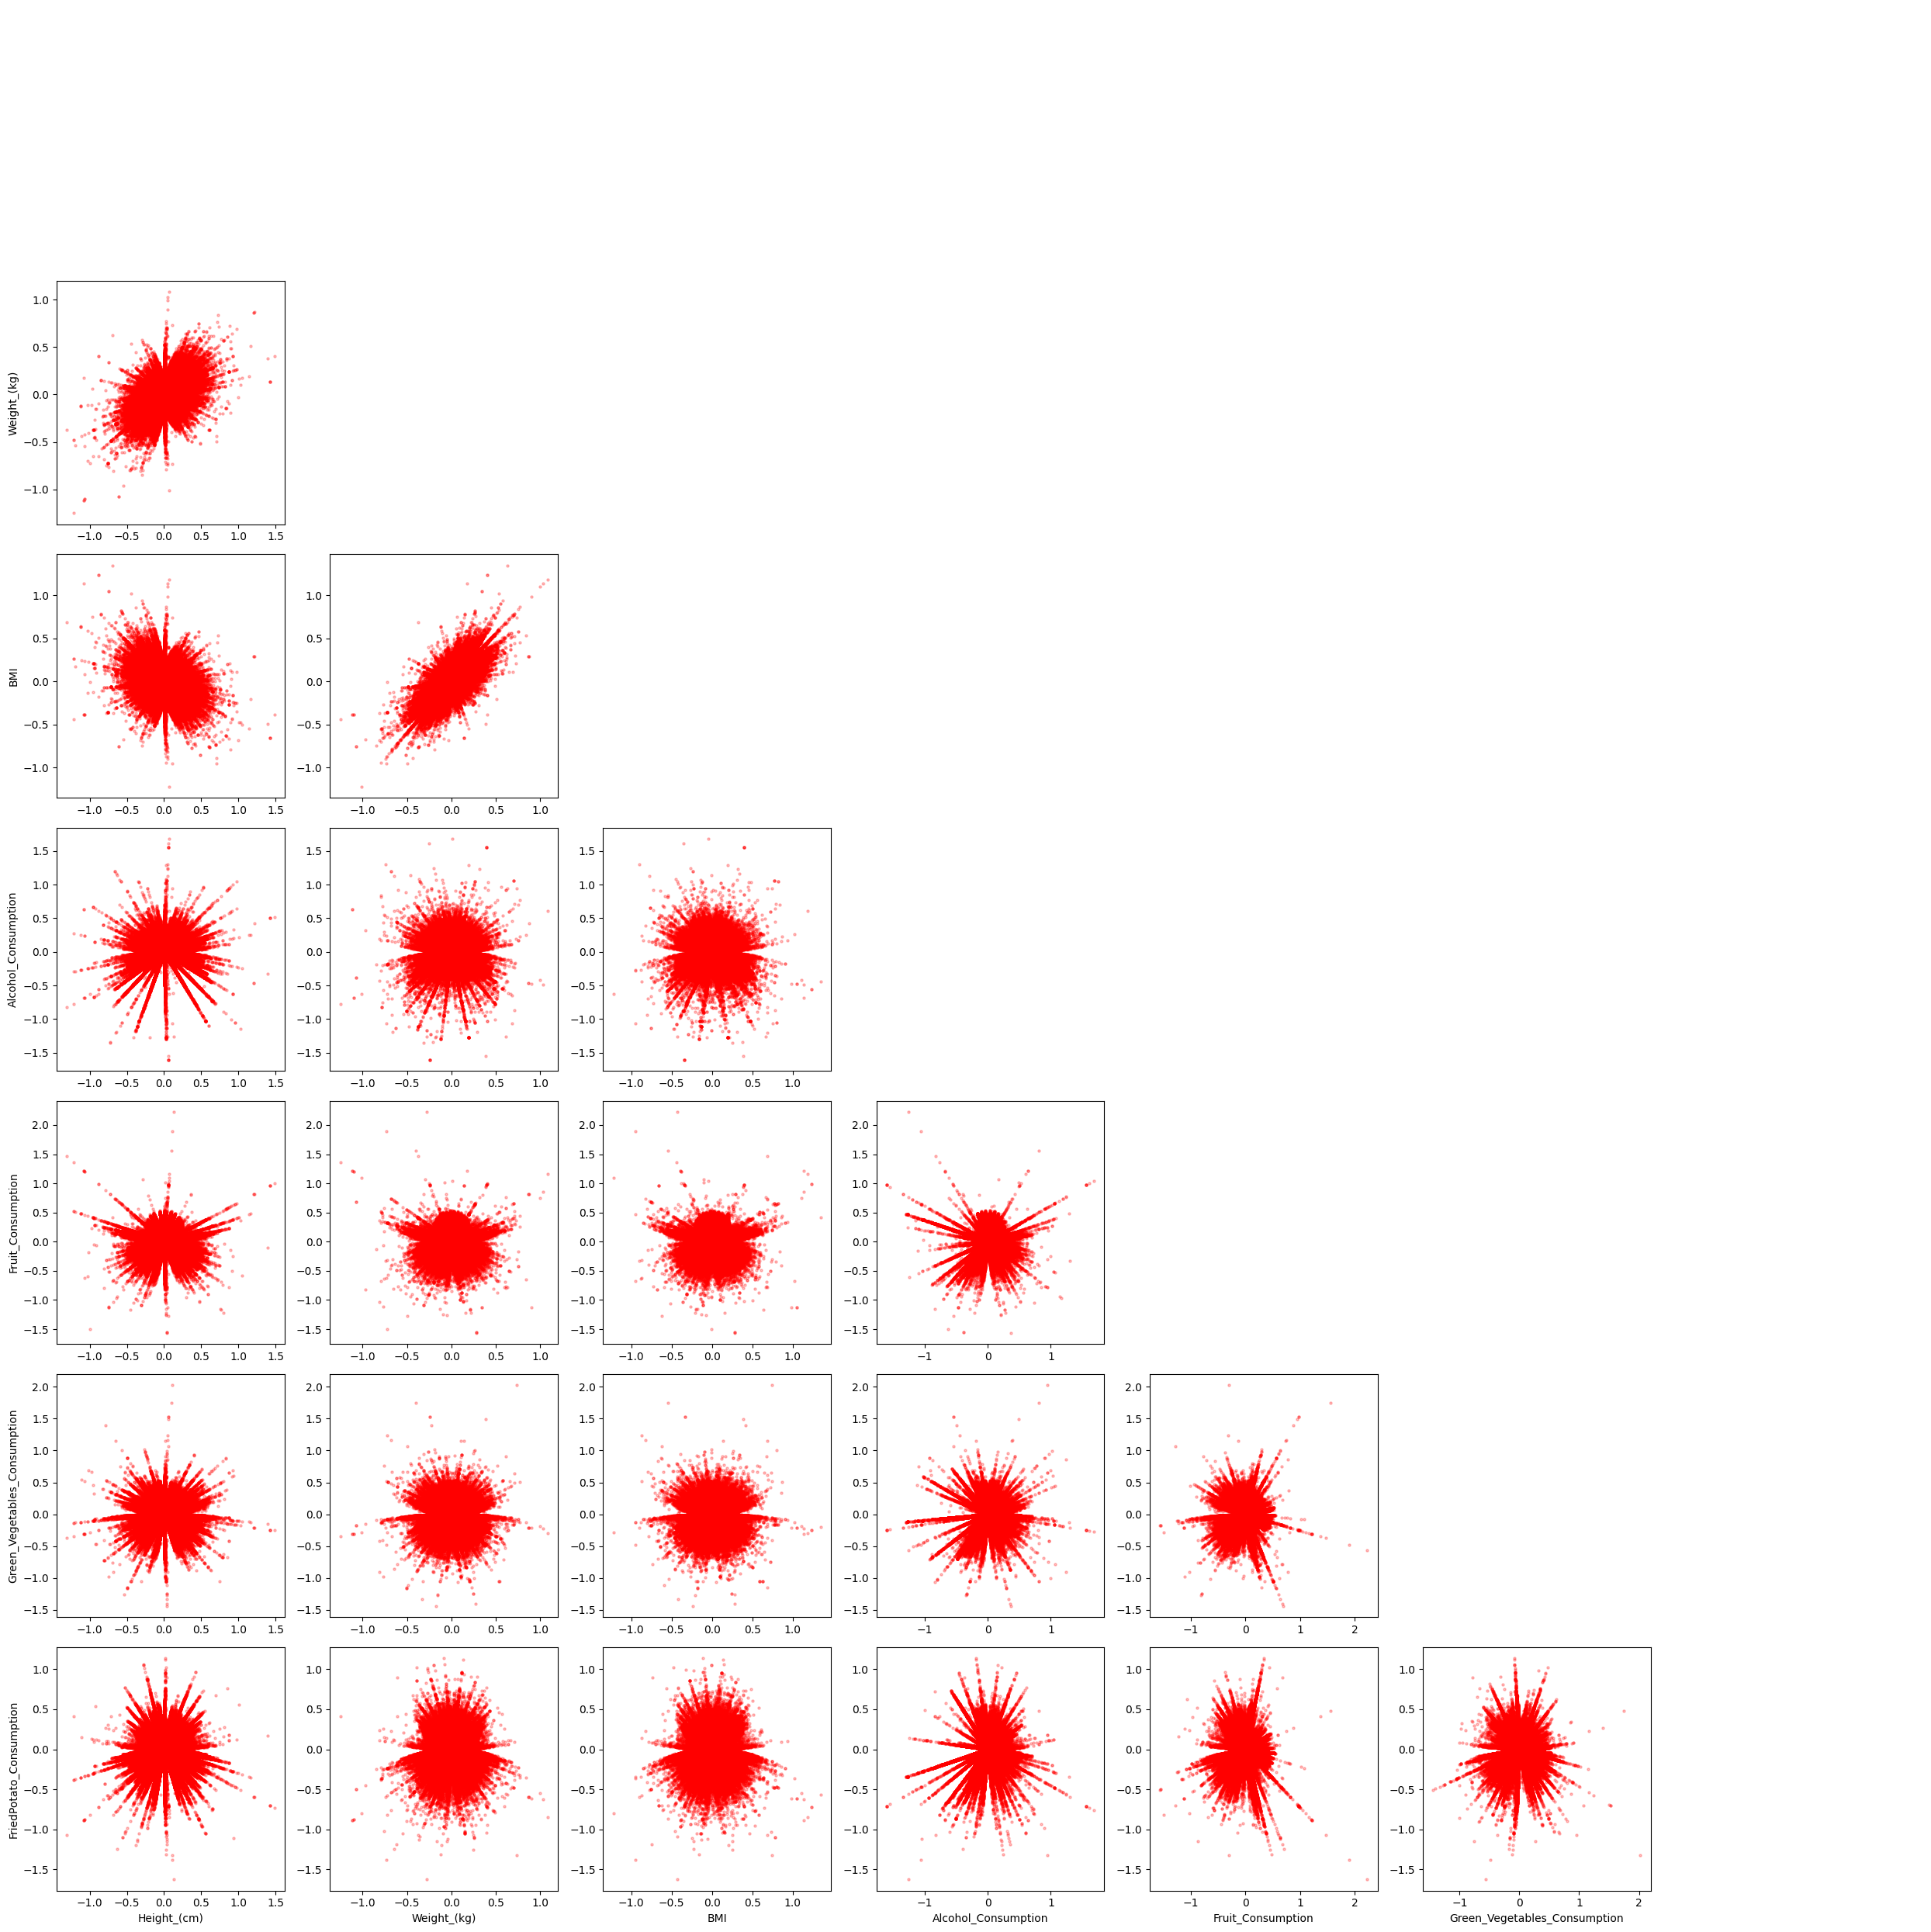

In [31]:
data_plot('scattermatrix', df_numeric_cleaned_,savefig=True, num_fig=6)

In [32]:
df_cleaned = df_.iloc[df_numeric_cleaned.index.values,:].copy()
df_cleaned.reset_index(drop = True, inplace = True)
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195620 entries, 0 to 195619
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                195620 non-null  object 
 1   Checkup                       195620 non-null  object 
 2   Exercise                      195620 non-null  object 
 3   Heart_Disease                 195620 non-null  object 
 4   Skin_Cancer                   195620 non-null  object 
 5   Other_Cancer                  195620 non-null  object 
 6   Depression                    195620 non-null  object 
 7   Diabetes                      195620 non-null  object 
 8   Arthritis                     195620 non-null  object 
 9   Sex                           195620 non-null  object 
 10  Age_Category                  195620 non-null  object 
 11  Height_(cm)                   195620 non-null  int64  
 12  Weight_(kg)                   195620 non-nul

In [33]:
contador.add_perdidas(df_cleaned)
contador.reporte()
print()

Total number of records : 305657
Current number of records:  195620
Lost records: 110037
Total number of lost records: 113234



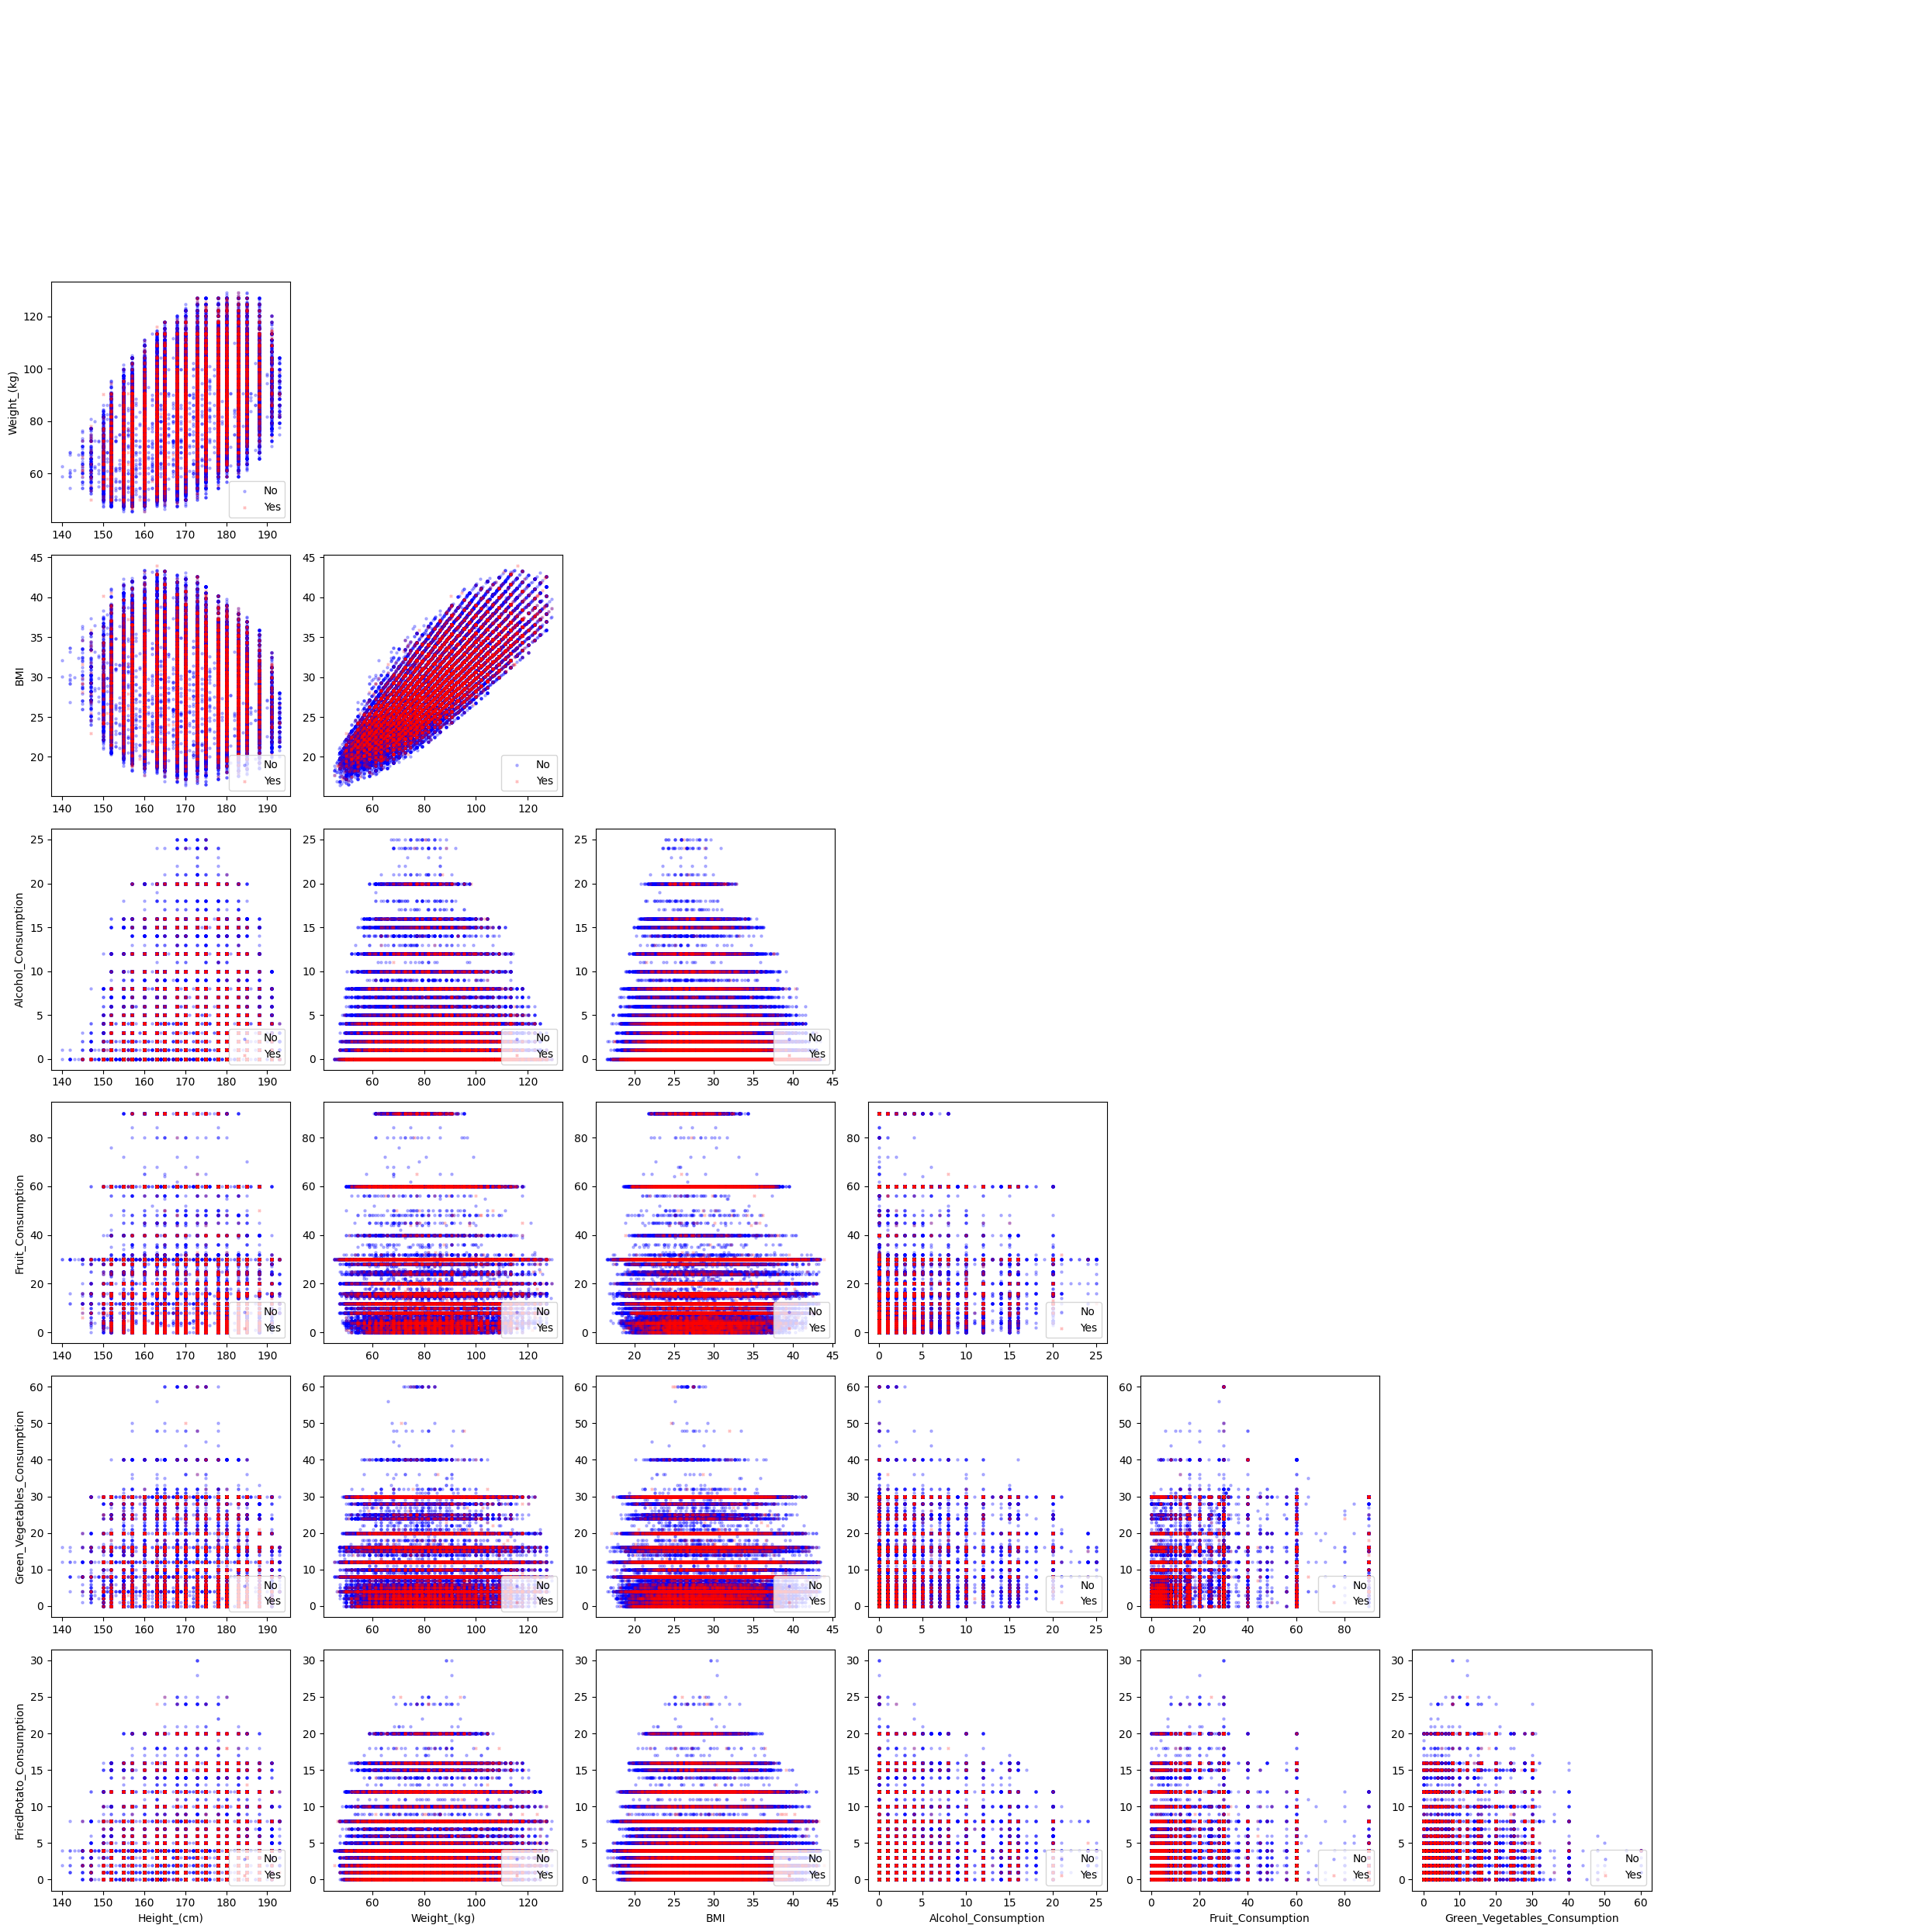

In [34]:
data = df_cleaned.drop(columns=categoric_cols).drop(columns='Heart_Disease')
response  = df_cleaned['Heart_Disease']

num_vars = len(data.columns)

fig, axes = plt.subplots(nrows=num_vars, ncols=num_vars, figsize=(25,25))


for i in range(num_vars):
    for j in range(num_vars):
        ax = axes[i, j]
        
        if i > j:  
            ax.scatter(data[response == 'No'].iloc[:, j], data[response == 'No'].iloc[:, i], 
                       color='blue', alpha=0.25, s=5, label='No')
            ax.scatter(data[response == 'Yes'].iloc[:, j], data[response == 'Yes'].iloc[:, i], 
                       color='red', alpha=0.25, s=5, marker='x', label='Yes')
            ax.legend(loc='lower right')
        else:
            ax.axis('off')  
            
        if i == num_vars - 1:  
            ax.set_xlabel(data.columns[j])
        
        if j == 0:  
            ax.set_ylabel(data.columns[i])
plt.tight_layout()

if True:
    # Save fig
    name = f'figura00{31}'
    file_name = f"{name}.png"
plt.savefig(file_name, dpi=300, format='png', bbox_inches="tight")

plt.show()

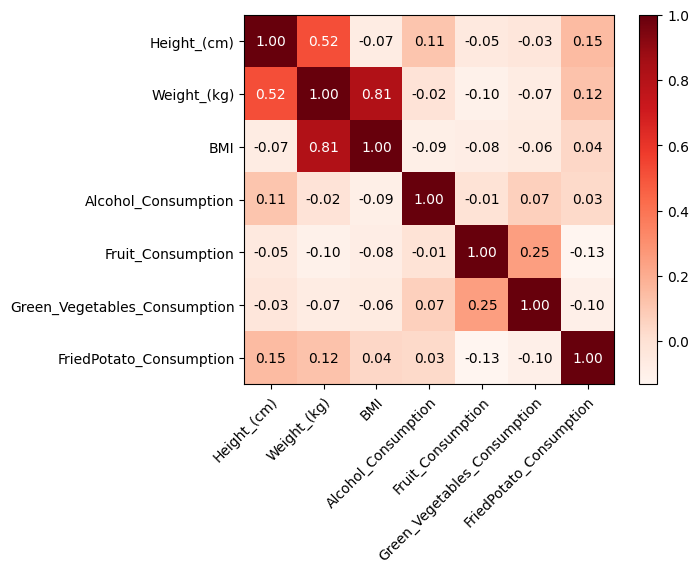

In [35]:
# Correlation matrix of numerical variables
cols = df_numeric.columns
cm = np.corrcoef(df_numeric_cleaned.values.T)
hm = heatmap(cm, row_names=cols, column_names=cols, cmap='Reds')

# Save fig
name = 'figura007'
file_name = f"{name}.png"
plt.savefig(file_name, dpi=300, format='png', bbox_inches="tight")

plt.show()


# 3. DATA VISUALIZATION

In [36]:
Y = df_cleaned['Heart_Disease'].copy() 
print(Y.value_counts())


Heart_Disease
No     179444
Yes     16176
Name: count, dtype: int64


In [37]:
# Short some name values of Checkup and Diabetes columns.
df_cleaned['Checkup'] = df_cleaned['Checkup'].map({'Within the past year': 'w1y', 'Within the past 2 years': 'w2y', 
                           '5 or more years ago': '+5y', 'Within the past 5 years': 'w5y', 'Never': 'Never'})
df_cleaned['Diabetes'] = df_cleaned['Diabetes'].map({'Yes': 'Yes', 'No': 'No', 'No, pre-diabetes or borderline diabetes': 'N/Prediabetes',
                                                     'Yes, but female told only during pregnancy':'Y/Only in pregnacy'})

C:\Users\MyLENOVO\AppData\Local\Temp\ipykernel_9612\931540685.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cleaned.groupby([var, 'Heart_Disease']).size().unstack().plot(kind='bar', stacked=False,
C:\Users\MyLENOVO\AppData\Local\Temp\ipykernel_9612\931540685.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cleaned.groupby([var, 'Heart_Disease']).size().unstack().plot(kind='bar', stacked=False,


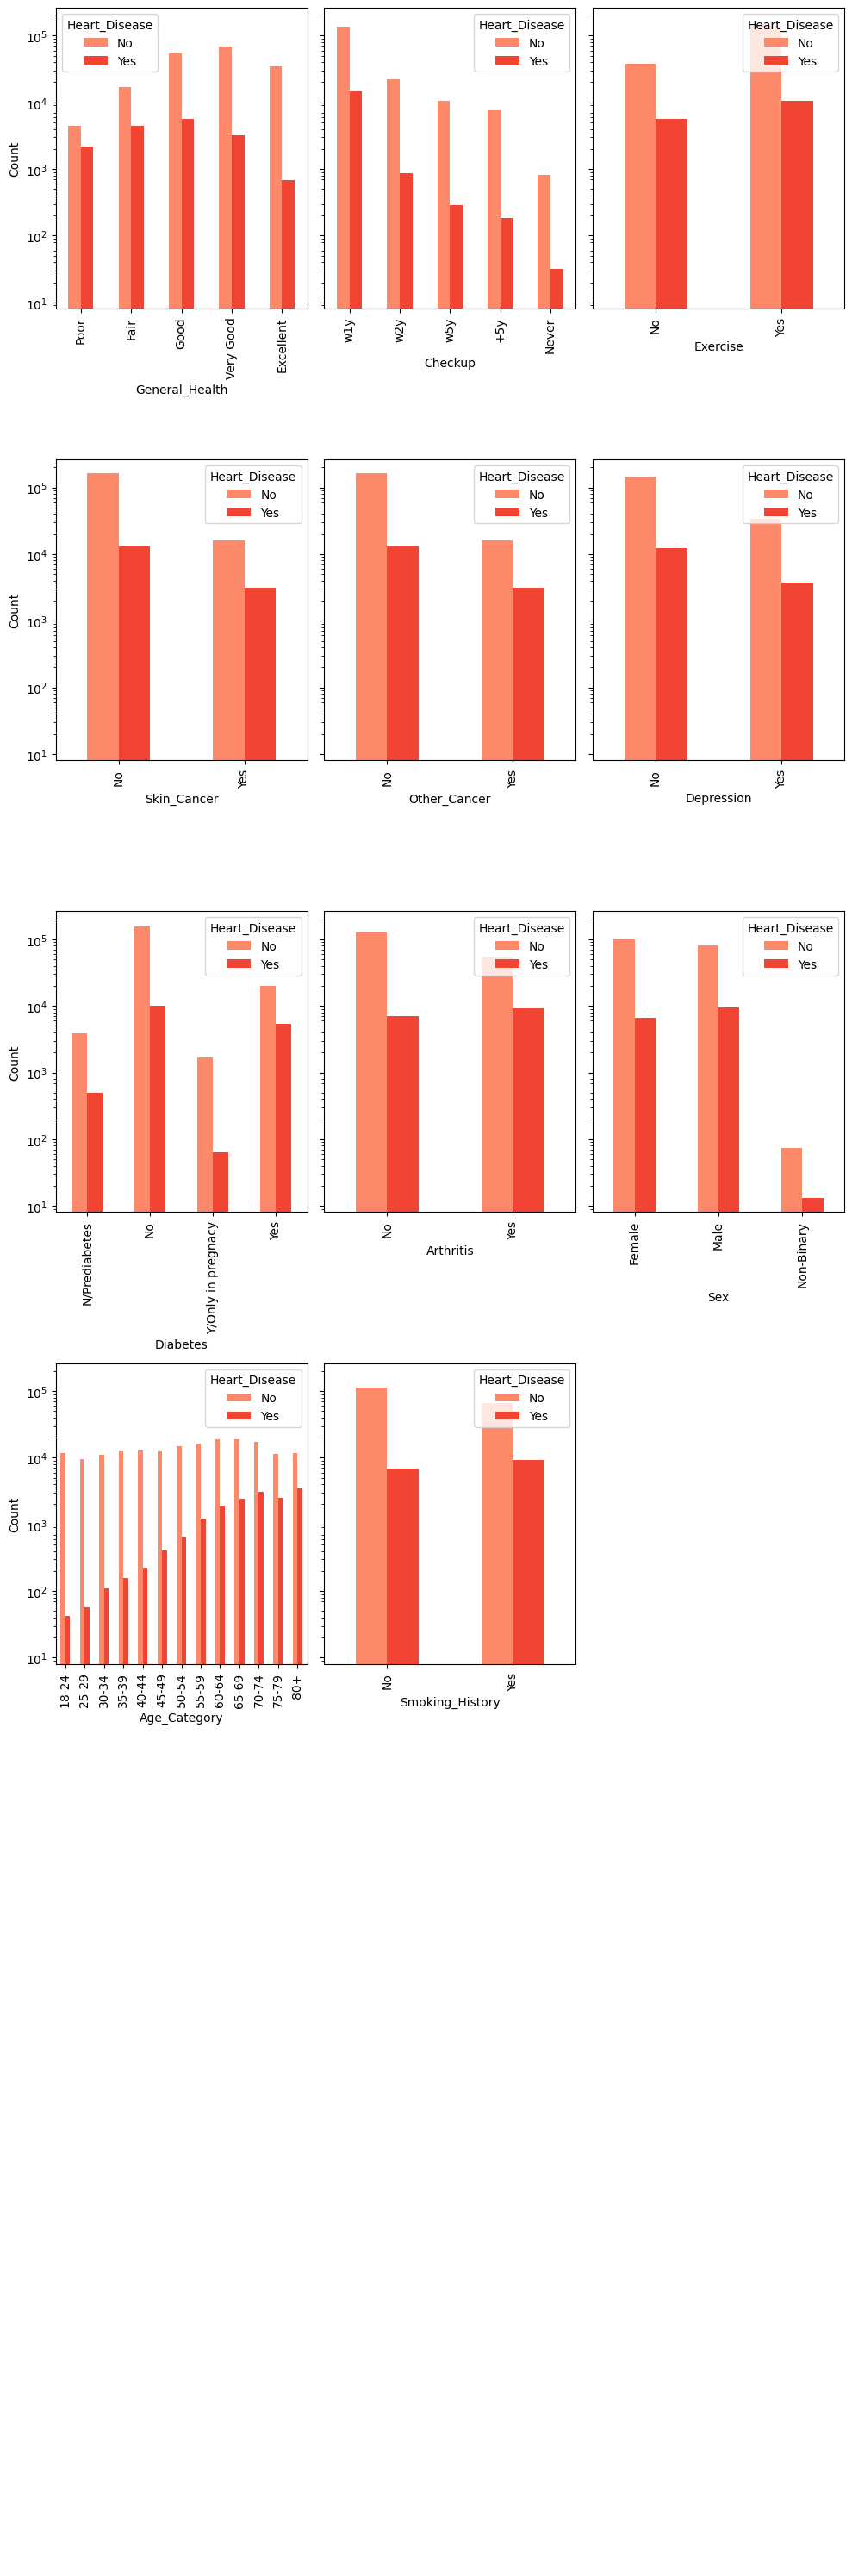

In [38]:
order_dict = {
    'General_Health': ['Poor', 'Fair', 'Good','Very Good','Excellent'],  # desired forder or 'Hearal_Health'
    'Checkup': ['w1y', 'w2y', 'w5y', '+5y', 'Never'] # desired forder or  'Checkup'
}

# Apply desired order
for var, order in order_dict.items():
    if var in df_cleaned.columns:
        df_cleaned[var] = pd.Categorical(df_cleaned[var], categories=order, ordered=True)

columns_names = categoric_cols[categoric_cols != 'Heart_Disease']

fig, axes = plt.subplots(nrows=6,ncols=3, figsize=(10,30), sharex=False, sharey=True)

axes= axes.flatten()

# Barplot preparation data
for i, var in enumerate(columns_names):
    df_cleaned.groupby([var, 'Heart_Disease']).size().unstack().plot(kind='bar', stacked=False, 
                                                                     ax=axes[i], legend=True, 
                                                                     color=plt.cm.Reds([0.4, 0.6, 0.7, 0.9]))
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
    axes[i].set_yscale('log')
    #axes[i].legend()

# Additional blank axis are switched off
for j in range(len(columns_names), len(axes)):
    axes[j].axis('off')

plt.tight_layout()

# Save fig
name = 'figura008'
file_name = f"{name}.png"
plt.savefig(file_name, dpi=300, format='png', bbox_inches="tight")

plt.show()


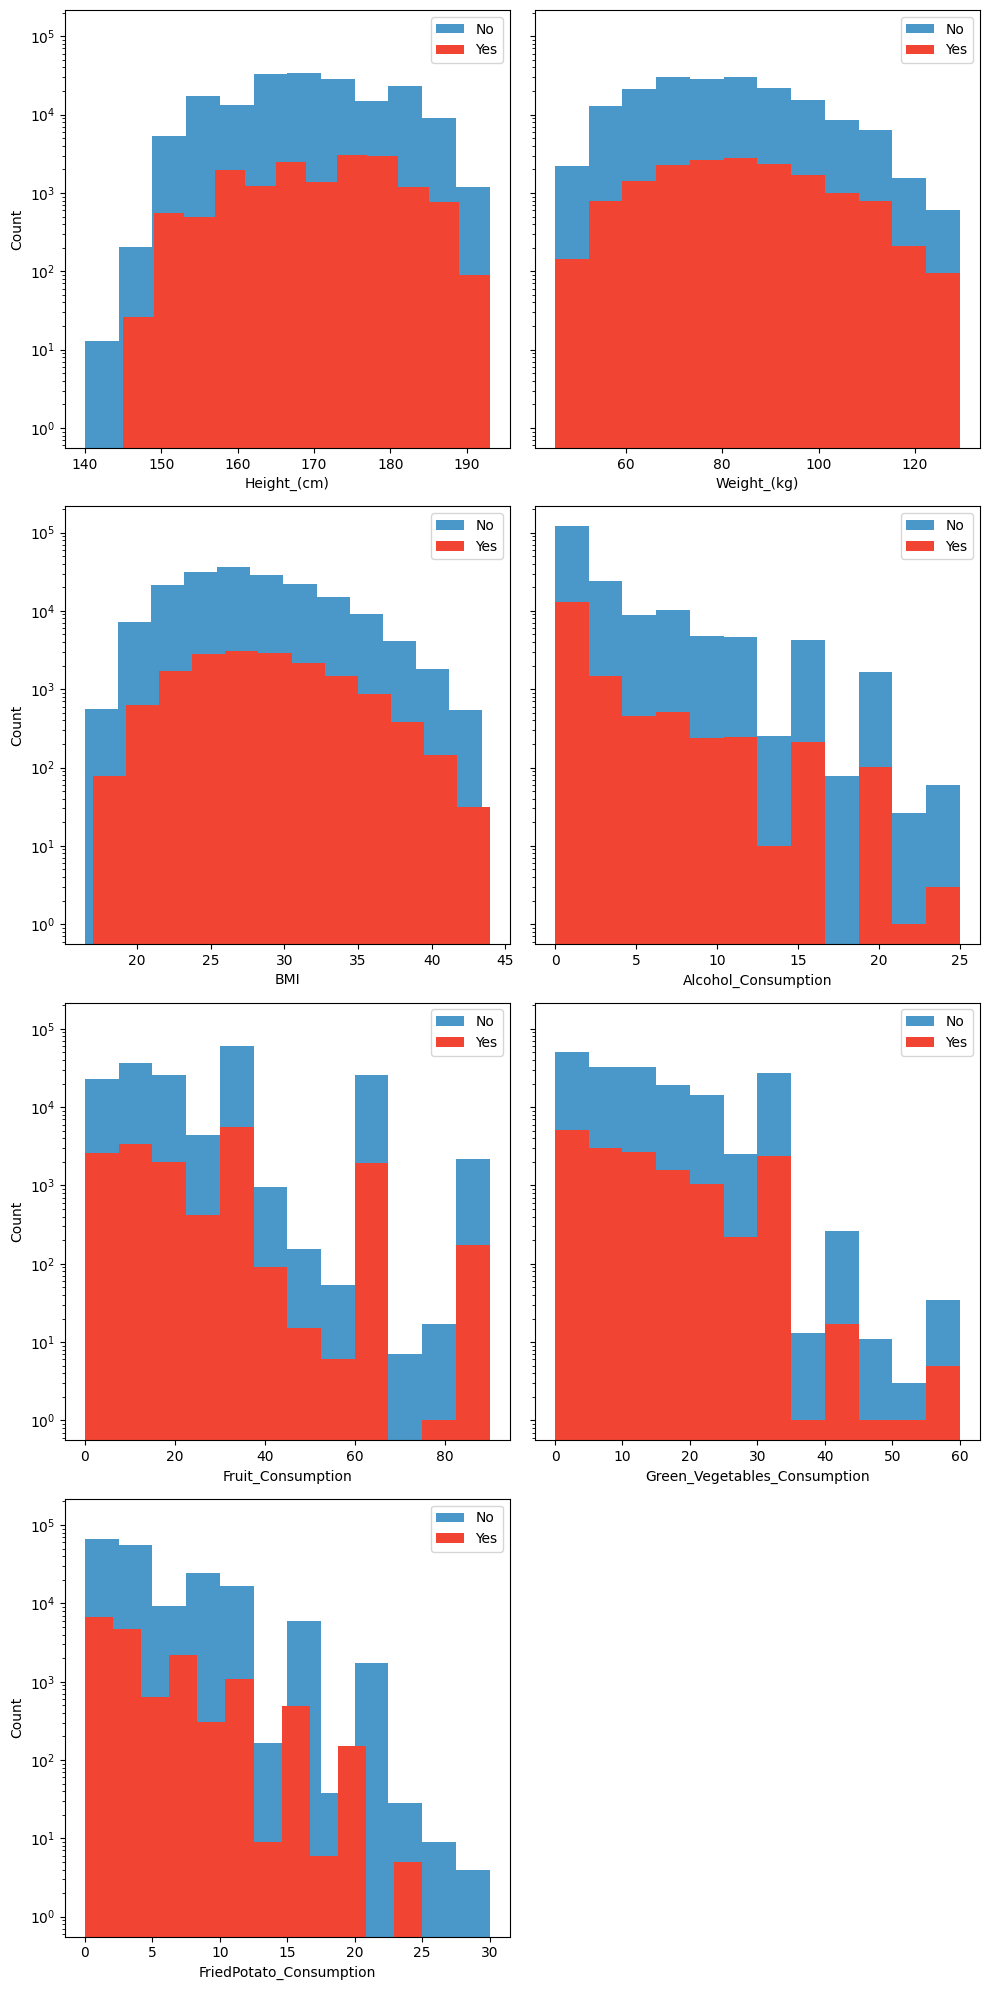

In [39]:
columns_names = numeric_cols
# Creting subplots
fig, axes = plt.subplots(nrows=4,ncols=2, figsize=(10,20), sharex=False, sharey=True)

axes= axes.flatten()

for i, var in enumerate(columns_names):
    df_cleaned[Y == 'No' ][var].plot(kind='hist', stacked=False, ax=axes[i], bins=12,  legend=True, 
                                     label = 'No', color=plt.cm.Blues([0.6]))
    df_cleaned[Y == 'Yes'][var].plot(kind='hist', stacked=False, ax=axes[i], bins=12, legend=True, 
                                     label = 'Yes', color=plt.cm.Reds([0.6]))
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
    axes[i].set_yscale('log')
    #axes[i].legend()

for j in range(len(columns_names), len(axes)):
    axes[j].axis('off')

plt.tight_layout()

# Save fig
name = 'figura009'
file_name = f"{name}.png"
plt.savefig(file_name, dpi=300, format='png', bbox_inches="tight")

plt.show()

# 4. DATA PREPROCESSING

In [40]:
y = Y.apply(lambda x: 1 if x =='Yes' else 0)
X = df_cleaned.drop(columns=['Heart_Disease'])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195620 entries, 0 to 195619
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   General_Health                195620 non-null  category
 1   Checkup                       195620 non-null  category
 2   Exercise                      195620 non-null  object  
 3   Skin_Cancer                   195620 non-null  object  
 4   Other_Cancer                  195620 non-null  object  
 5   Depression                    195620 non-null  object  
 6   Diabetes                      195620 non-null  object  
 7   Arthritis                     195620 non-null  object  
 8   Sex                           195620 non-null  object  
 9   Age_Category                  195620 non-null  object  
 10  Height_(cm)                   195620 non-null  int64   
 11  Weight_(kg)                   195620 non-null  float64 
 12  BMI                           

In [41]:
# Unique values of categorical values
for col in X.select_dtypes(include=['object']).columns:
    print(col +': ', X[col].unique())

Exercise:  ['No' 'Yes']
Skin_Cancer:  ['No' 'Yes']
Other_Cancer:  ['No' 'Yes']
Depression:  ['No' 'Yes']
Diabetes:  ['Yes' 'No' 'N/Prediabetes' 'Y/Only in pregnacy']
Arthritis:  ['No' 'Yes']
Sex:  ['Female' 'Male' 'Non-Binary']
Age_Category:  ['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '55-59'
 '35-39' '40-44' '30-34' '25-29']
Smoking_History:  ['No' 'Yes']


In [42]:
## warning: only compiling it one time
X['General_Health'] = X['General_Health'].map({'Poor': 1, 'Fair': 2,'Good': 3, 'Very Good': 4, 'Excellent': 5})
X['Checkup'] = X['Checkup'].map({'w1y': 1, 'w2y': 2, '+5y': 4, 'w5y': 3, 'Never': 5})
X[['Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History']] = X[['Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History']].replace({'Yes': 1, 'No': 0})
X['Age_Category']= X['Age_Category'].map({'70-74': 11, '60-64': 9, '75-79': 12, '80+': 13, 
                                          '65-69': 10, '50-54': 7, '45-49': 6, '18-24': 1,
                                          '30-34': 3, '55-59': 8, '35-39': 4, '40-44': 5, '25-29': 2})

C:\Users\MyLENOVO\AppData\Local\Temp\ipykernel_9612\707147267.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[['Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History']] = X[['Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History']].replace({'Yes': 1, 'No': 0})


In [43]:
X = pd.get_dummies(X, columns=['Sex', 'Diabetes'], drop_first=True).astype(float) # one-hot-encoding and dtype transformation

In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195620 entries, 0 to 195619
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                195620 non-null  float64
 1   Checkup                       195620 non-null  float64
 2   Exercise                      195620 non-null  float64
 3   Skin_Cancer                   195620 non-null  float64
 4   Other_Cancer                  195620 non-null  float64
 5   Depression                    195620 non-null  float64
 6   Arthritis                     195620 non-null  float64
 7   Age_Category                  195620 non-null  float64
 8   Height_(cm)                   195620 non-null  float64
 9   Weight_(kg)                   195620 non-null  float64
 10  BMI                           195620 non-null  float64
 11  Smoking_History               195620 non-null  float64
 12  Alcohol_Consumption           195620 non-nul

### Correlation analysis

In [45]:
# Create a list to store the results
results = []

# Compute point-biserial correlation and p-value
for col in numeric_cols:
    corr, p_value = pointbiserialr(X[col], y)
    corr = round(corr,4)
    results.append({'Variable': col, 'Correlation': corr, 'P-value': p_value})

# Convert to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)
print(results_df.to_latex(index=True))

                       Variable  Correlation        P-value
0                   Height_(cm)       0.0255   1.936767e-29
1                   Weight_(kg)       0.0568  1.203219e-139
2                           BMI       0.0478   1.785842e-99
3           Alcohol_Consumption      -0.0693  1.658422e-206
4             Fruit_Consumption      -0.0245   1.832423e-27
5  Green_Vegetables_Consumption      -0.0196   4.342072e-18
6       FriedPotato_Consumption      -0.0194   9.254207e-18
\begin{tabular}{llrr}
\toprule
 & Variable & Correlation & P-value \\
\midrule
0 & Height_(cm) & 0.025500 & 0.000000 \\
1 & Weight_(kg) & 0.056800 & 0.000000 \\
2 & BMI & 0.047800 & 0.000000 \\
3 & Alcohol_Consumption & -0.069300 & 0.000000 \\
4 & Fruit_Consumption & -0.024500 & 0.000000 \\
5 & Green_Vegetables_Consumption & -0.019600 & 0.000000 \\
6 & FriedPotato_Consumption & -0.019400 & 0.000000 \\
\bottomrule
\end{tabular}



In [46]:
categoric_cols = X.drop(columns=numeric_cols).columns
# Create a list to store the results
results = []

# Iterate through numerical features
for col in categoric_cols:
    contingency_table = pd.crosstab(X[col], y)
    chi2_, p_value, _, _ = chi2_contingency(contingency_table)
    results.append({'Variable': col, 'statistic': round(chi2_,2), 'P-value': round(p_value,4)})
    #print(f"Variable: {col}, Chi-squared: {chi2_}, p-valor: {p_value}")

# Convert to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)
print(results_df.to_latex(index=True))


                       Variable  statistic  P-value
0                General_Health   13010.35   0.0000
1                       Checkup    1850.25   0.0000
2                      Exercise    1811.02   0.0000
3                   Skin_Cancer    1759.32   0.0000
4                  Other_Cancer    1757.24   0.0000
5                    Depression     168.32   0.0000
6                     Arthritis    4607.05   0.0000
7                  Age_Category   12345.71   0.0000
8               Smoking_History    2625.36   0.0000
9                      Sex_Male    1310.18   0.0000
10               Sex_Non-Binary       4.27   0.0388
11                  Diabetes_No    5833.30   0.0000
12  Diabetes_Y/Only in pregnacy      48.29   0.0000
13                 Diabetes_Yes    6710.03   0.0000
\begin{tabular}{llrr}
\toprule
 & Variable & statistic & P-value \\
\midrule
0 & General_Health & 13010.350000 & 0.000000 \\
1 & Checkup & 1850.250000 & 0.000000 \\
2 & Exercise & 1811.020000 & 0.000000 \\
3 & Skin_Cance

In [47]:
# Fit data using logistic regression 
X_with_constant = sm.add_constant(X)  # Agregar constante
model = sm.Logit(y, X_with_constant).fit()
feat_labels = X.columns
coefficients = model.params
coefficients = abs(coefficients[1:].values)
indices = np.argsort(coefficients)[::-1]
print()
for f in range(X.shape[1]):
    print( "%2d) %-*s %f" % (f+1,30,feat_labels[indices[f]], 
                             coefficients[indices[f]]))
#print(model.summary())

Optimization terminated successfully.
         Current function value: 0.223117
         Iterations 8

 1) Sex_Non-Binary                 1.046849
 2) Sex_Male                       0.853375
 3) General_Health                 0.592133
 4) Diabetes_Yes                   0.426386
 5) Smoking_History                0.414242
 6) Age_Category                   0.277647
 7) Arthritis                      0.245647
 8) Depression                     0.230799
 9) Checkup                        0.222601
10) Skin_Cancer                    0.110653
11) Diabetes_No                    0.097595
12) Other_Cancer                   0.038670
13) Diabetes_Y/Only in pregnacy    0.038571
14) Alcohol_Consumption            0.022687
15) Exercise                       0.014547
16) Height_(cm)                    0.007168
17) FriedPotato_Consumption        0.004733
18) Weight_(kg)                    0.003937
19) Green_Vegetables_Consumption   0.003347
20) BMI                            0.002013
21) Fruit_Consump

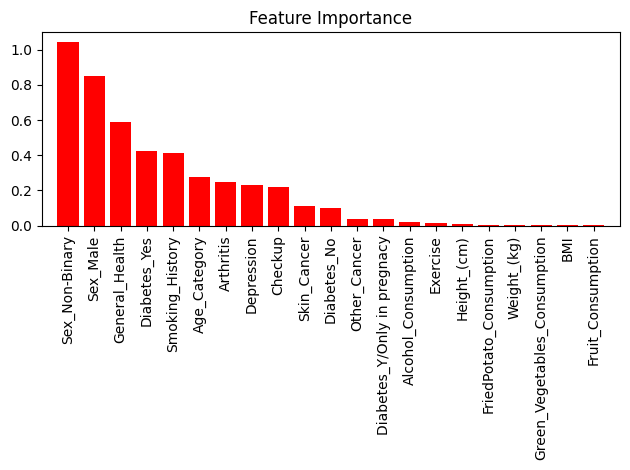

In [48]:
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), 
        coefficients[indices], align ='center', color='red')
plt.xticks(range(X.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
# Save fig
name = 'figura009a'
file_name = f"{name}.png"
plt.savefig(file_name, dpi=300, format='png', bbox_inches="tight")
plt.show()

### Data Splitting

In [49]:
# X: feature variable
# y: response variable

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size= 0.3, random_state= seed, 
                                                    stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size= 0.5, 
                                                    random_state= seed, stratify=y_temp)
print(y_train.value_counts())

Heart_Disease
0    125611
1     11323
Name: count, dtype: int64


In [50]:
dict_counts= {'X_train/y_train': y_train.value_counts().values,'X_valid/y_valid': y_valid.value_counts().values, 'X_test/y_test': y_test.value_counts().values}

values_df = pd.DataFrame(dict_counts)


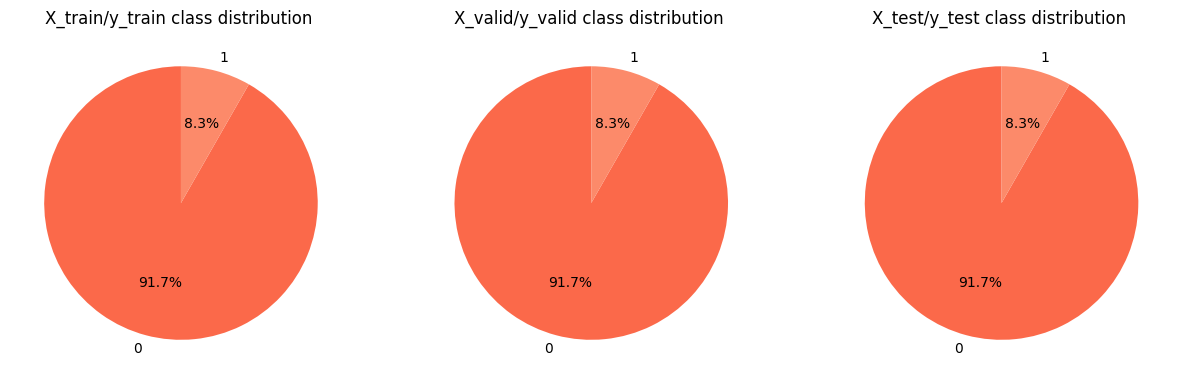

\begin{tabular}{lrrr}
\toprule
 & X_train/y_train & X_valid/y_valid & X_test/y_test \\
\midrule
0 & 125611 & 26916 & 26917 \\
1 & 11323 & 2427 & 2426 \\
\bottomrule
\end{tabular}



In [51]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(15,5))


for i, col in enumerate(values_df.columns):
    values_df[col].plot.pie(ax=axes[i], autopct='%1.1f%%', startangle=90, 
                            legend=False, colors=plt.cm.Reds([0.5, 0.4, 0.3, 0.2]))
    axes[i].set_ylabel('') 
    axes[i].set_title(f'{col} class distribution ')  

# Save fig
name = 'figura0010'
file_name = f"{name}.png"
plt.savefig(file_name, dpi=300, format='png', bbox_inches="tight")
plt.show()
latex_code = values_df.to_latex(index=True)  # LaTeX code
print(latex_code)

In [52]:
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols]) # normalize numericol columns

### Resampling techniques

In [53]:
X_train_std = X_train.values
# Config K-Fold and seed again
num_folds = 10  # Cambia esto según lo necesites
seed = 42
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=seed)

# f1 sets
f1_smote = []  # F1 scores para SMOTE
f1_undersampling = []  # F1 scores para Undersampling

# K-Fold process
for train_index, valid_index in kf.split(X_train_std, y_train.values):
    X_kf_train, X_kf_valid = X_train_std[train_index], X_train_std[valid_index]
    y_kf_train, y_kf_valid = y_train.iloc[train_index], y_train.iloc[valid_index] # dont use .iloc if y_train is a serie/data frame

    # Aplicar SMOTE
    smote = SMOTE(random_state=seed, sampling_strategy=0.5)
    X_smote, y_smote = smote.fit_resample(X_kf_train, y_kf_train)

    # Entrenar el modelo con SMOTE y evaluar en el conjunto de validación de K-Fold
    model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2, weights = 'distance')
    model.fit(X_smote, y_smote)
    y_pred_smote = model.predict(X_kf_valid)
    f1_smote.append(f1_score(y_kf_valid, y_pred_smote, average='macro'))

    # Aplicar Undersampling
    undersampler = RandomUnderSampler(random_state=seed, sampling_strategy=0.5)
    X_under, y_under = undersampler.fit_resample(X_kf_train, y_kf_train)

    # Entrenar el modelo con Undersampling y evaluar en el conjunto de validación de K-Fold
    model.fit(X_under, y_under)
    y_pred_under = model.predict(X_kf_valid)
    f1_undersampling.append(f1_score(y_kf_valid, y_pred_under, average='macro'))

# Normality test for SMOTE
stat_smote, p_value_smote = shapiro(f1_smote)
print(f'Mean of f1_smote is: {np.mean(f1_smote)}')
print(f'Median of f1_smote is: {statistics.median(f1_smote)}')
print(f'Shapiro-Wilk for SMOTE: Estadístico={stat_smote}, p-valor={p_value_smote}')

# Normality test Undersampling
stat_under, p_value_under = shapiro(f1_undersampling)
print(f'Mean of f1_under is: {statistics.median(f1_undersampling)}')
print(f'Median of f1_under is: {statistics.median(f1_undersampling)}')
print(f'Shapiro-Wilk for Undersampling: Estadístico={stat_under}, p-valor={p_value_under}')

#Confidence level alpha 0.05
if p_value_smote > 0.05 and p_value_under > 0.05:
    # First analyze test statitics, if both statistics are less than 0.05 then both damp
    t_stat, p_value = ttest_rel(f1_smote, f1_undersampling)
    print(f'Test t: Estadístico={t_stat}, p-valor={p_value}')
else:
    # Use  Wilcoxon test when one of the samples is not normal
    w_stat, p_value = wilcoxon(f1_smote, f1_undersampling)
    print(f'Wilcoxon: Estadístico={w_stat}, p-valor={p_value}')

Mean of f1_smote is: 0.5858215844289917
Median of f1_smote is: 0.58648992608915
Shapiro-Wilk for SMOTE: Estadístico=0.9020007884451452, p-valor=0.23042954615734973
Mean of f1_under is: 0.6019225268076178
Median of f1_under is: 0.6019225268076178
Shapiro-Wilk for Undersampling: Estadístico=0.900268605301614, p-valor=0.22058865974054803
Test t: Estadístico=-14.259862134415645, p-valor=1.7493025693114392e-07


# 5. MACHINE LEARNING MODELS

Esemble method: Adaboost (Decision Trees)

XGBoost

DecisionTree 

KNN




### Assessing feature importance analysis

 1) BMI                            0.143038
 2) Weight_(kg)                    0.123179
 3) Green_Vegetables_Consumption   0.092306
 4) Age_Category                   0.092155
 5) Fruit_Consumption              0.088744
 6) Height_(cm)                    0.088538
 7) FriedPotato_Consumption        0.084679
 8) General_Health                 0.067954
 9) Alcohol_Consumption            0.052109
10) Arthritis                      0.019519
11) Exercise                       0.018520
12) Depression                     0.018131
13) Smoking_History                0.017746
14) Sex_Male                       0.017038
15) Other_Cancer                   0.015727
16) Skin_Cancer                    0.015029
17) Diabetes_Yes                   0.014969
18) Checkup                        0.014794
19) Diabetes_No                    0.014552
20) Diabetes_Y/Only in pregnacy    0.000948
21) Sex_Non-Binary                 0.000325


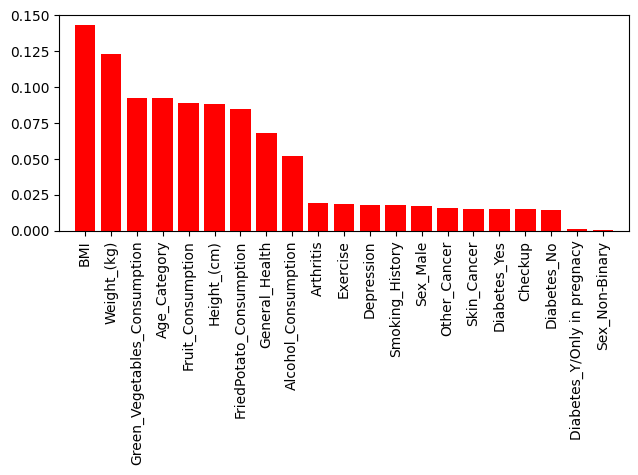

In [54]:
feat_labels = X.columns

forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit model
forest.fit(X_train, y_train)

importances = forest.feature_importances_ # importance numbers

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print( "%2d) %-*s %f" % (f+1,30,feat_labels[indices[f]], 
                             importances[indices[f]]))

cut_off = 0.05
importances_df = pd.DataFrame(importances[indices], index=feat_labels[indices], columns=['Importance'])
new_feat_labels = importances_df[importances_df['Importance'] >= cut_off].index

#plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices], align ='center', color='red')
plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()

# Save fig
name = 'figura0010a'
file_name = f"{name}.png"
plt.savefig(file_name, dpi=300, format='png', bbox_inches="tight")

plt.show()

In [55]:
X_train_sample_df, X_temp_sample_df, y_train_sample_df, y_temp_sample_df = train_test_split(X, y, test_size= 0.3, random_state= seed, stratify=y)
X_valid_sample_df, X_test_sample_df, y_valid_sample_df, y_test_sample_df = train_test_split(X_temp_sample_df, y_temp_sample_df,
                                                                                             test_size= 0.5, random_state= seed,
                                                                                               stratify=y_temp_sample_df)
resampler = RandomUnderSampler(random_state=42, sampling_strategy=0.5) #SMOTE(random_state=seed, sampling_strategy=0.1)
#resampler = SMOTE(random_state=seed, sampling_strategy=0.5)

X_train_sample_df, y_train_sample_df = resampler.fit_resample(X_train_sample_df, y_train_sample_df)

scaler = StandardScaler()
X_train_sample_df[numeric_cols] = scaler.fit_transform(X_train_sample_df[numeric_cols])
y_train_sample_df.value_counts()

Heart_Disease
0    22646
1    11323
Name: count, dtype: int64

In [56]:
y_valid_sample_df.value_counts()

Heart_Disease
0    26916
1     2427
Name: count, dtype: int64

In [57]:
y_test_sample_df.value_counts()

Heart_Disease
0    26917
1     2426
Name: count, dtype: int64

# 6. EVALUATING MODELS 

In [58]:
X_train_sample = X_train_sample_df.values 
y_train_sample = y_train_sample_df.values
X_valid_sample = X_valid_sample_df.values
y_valid_sample = y_valid_sample_df.values
X_test_sample = X_test_sample_df.values
y_test_sample = y_test_sample_df.values

### Auxiliar functions

In [59]:
def confusion_matrix_figure(set_name,y_true, y_pred, savefig=False, num_fig=1, dpi=300):
    '''' 
    
    print model confusion matrix, classification report.
    '''

        
    confmat = confusion_matrix(y_true, y_pred)

    conf_entries = confmat.flatten()
    tn, fp, fn, tp = conf_entries[0], conf_entries[1], conf_entries[2], conf_entries[3]

    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Reds, alpha=0.5)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    #plt.title(f'{set_name} confusion matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    if savefig:
        name = f'figura00{num_fig}'
        file_name = f"{name}.png"
        fig.savefig(file_name, dpi=dpi, format='png', bbox_inches="tight")
   
    # Get the classification_report as a dictionary
    report_dict = classification_report(y_true, y_pred, output_dict=True)

    # Convert it to a DataFrame
    report_df = pd.DataFrame(report_dict).transpose().round(3)
    report_df.loc['accuracy'] = [report_df.loc['accuracy']['precision'], None, None,  None]
    
    sensitivity = tp/(tp+fn) 
    specificity = tn/(tn+fp)
    print(report_df.to_latex(index=True, float_format="{:.3f}".format))
    print(report_df)
    print(f'{set_name} specificity (0) : {specificity:.3f}')
    print(f'{set_name} sensitivity (1) : {sensitivity:.3f}')

In [60]:
def training_evaluation_figures(model, X_train,y_train,n_folds=5,n_interp_points=25,seed=seed,
                                savefig=False, num_fig=1, dpi=300):
    ''' 
    Model training evauation
    '''
    fpr_all = []
    tpr_all = []
    roc_auc_all = []
    f1_score_all = []
    # Initialize stratified cross-validation
    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=seed)

    # Cross validation
    for train_index, test_index in skf.split(X_train, y_train):
        X_skf_train, X_skf_test = X_train[train_index], X_train[test_index]
        y_skf_train, y_skf_test = y_train[train_index], y_train[test_index]
        
        # Fit model
        model.fit(X_skf_train, y_skf_train)
        
        # Predect probabilities
        y_scores = model.predict_proba(X_skf_test)[:, 1]  # Prbabilities for positive class (1)
        
        # Caculate ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_skf_test, y_scores)
        roc_auc = auc(fpr, tpr)
        f1_score_ = f1_score(y_skf_test, model.predict(X_skf_test), average='macro')
        
        # Storing fpr, tpr and roc_auc
        fpr_all.append(fpr)
        tpr_all.append(tpr)
        roc_auc_all.append(roc_auc)
        f1_score_all.append(f1_score_)

    # Calculate mean ROC curve (interpolate points on FPR range)
    mean_fpr = np.linspace(0, 1, n_interp_points)
    mean_tpr = np.zeros_like(mean_fpr)

    for fpr, tpr in zip(fpr_all, tpr_all):
        mean_tpr += np.interp(mean_fpr, fpr, tpr)

    mean_tpr /= len(fpr_all) # scale and get  mean_tpr

    # Mean AUC
    mean_auc = np.mean(roc_auc_all)
    mean_f1_score = np.mean(f1_score_all)


    # Predict labels for confussion matrix function
    y_pred = cross_val_predict(model, X_train, y_train, cv=skf)

    confusion_matrix_figure('Training',y_train, y_pred, savefig=True, num_fig=num_fig)

    # Plot ROC curves
    fig, ax = plt.subplots(nrows = 1, ncols=1, figsize=(10, 6))


    for fpr, tpr, roc_auc, i in zip(fpr_all, tpr_all, roc_auc_all, range(1,len(roc_auc_all)+1)):
        ax.plot(fpr, tpr, linestyle= '-',label = f'Fold {i}, ROC(AUC = {roc_auc:.2f}) ',alpha=0.9) 

    # Mean ROC curve
    plt.plot(mean_fpr, mean_tpr, color='k', linestyle=':', label=f'Mean ROC (AUC = {mean_auc:.2f})', linewidth=2)

    # Random guessing curve
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='random guessing (AUC = 0.5)')

    # Config plot features
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.tight_layout()
    if savefig:
        name = f'figura00{num_fig+1}'
        file_name = f"{name}.png"
        fig.savefig(file_name, dpi=dpi, format='png', bbox_inches="tight")
    plt.show(fig)

    # Print relevant info
    print(f'Mean AUC : {mean_auc:.2f}')
    print(f'Mean f1_score (macro): {mean_f1_score:.2f}')
    


In [61]:
def val_evaluation_figure(model,X_valid,y_valid, savefig=False, num_fig=1):
    '''
    This fuctions helps as a middle point throught model evaluation test stage
    '''
    
    y_pred = model.predict(X_valid)
    confusion_matrix_figure('Validation',y_valid, y_pred, savefig=savefig,num_fig=num_fig) # already saves image
        
    # y probabilities
    y_scores = model.predict_proba(X_valid)[:, 1]  # Prbabilities for positive class (1)
    
    # Caculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_valid, y_scores)
    roc_auc = auc(fpr, tpr)
    f1_score_valid = f1_score(y_valid, y_pred, average='macro')
    
    # Plot ROC curve
    _, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

    ax.plot(fpr, tpr, color='b', linestyle='-', label=f'Valid ROC(AUC = {roc_auc:.2f})', linewidth=2)

    # Plot random gueesing line
    ax.plot([0, 1], [0, 1], color='gray', linestyle='--', label='random guessing (AUC = 0.5)')

    return ax, f1_score_valid



In [62]:
def test_evaluation_figures(model, X_valid, y_valid, X_test,y_test, savefig=False, num_fig=1,dpi=300):
    ''' 
    Print both valid and test confussion matrix, classification report, ROC curves, AUC, f1-scores
    '''
    ax_valid, f1_score_valid = val_evaluation_figure(model, X_valid, y_valid, 
                                                     savefig=True, num_fig=num_fig)

    y_pred = model.predict(X_test)
    confusion_matrix_figure('Test',y_test, y_pred, savefig=True, num_fig=(num_fig+1))
    
    # y probabilities
    y_scores = model.predict_proba(X_test)[:, 1]  # probabilities for positive class (1)
    
    # Caculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc_test = auc(fpr, tpr)
    f1_score_test = f1_score(y_test, y_pred, average='macro')

        # Plot ROC curve
    ax_valid.plot(fpr, tpr, color='r', linestyle='-', 
                  label=f'Test ROC (AUC = {roc_auc_test:.2f})', linewidth=2)

    # Figure configuration
    ax_valid.set_xlabel('False Positive Rate')
    ax_valid.set_ylabel('True Positive Rate')
    ax_valid.legend(loc='lower right')
    
    if savefig:
        fig = ax_valid.figure
        name = f'figura00{num_fig+2}'
        file_name = f"{name}.png"
        fig.savefig(file_name, dpi=dpi, format='png', bbox_inches="tight")
    
    print(f'f1_score (macro) valid: {f1_score_valid:.2f}')
    print(f'f1_score (macro) test: {f1_score_test:.2f}')

## Grid Research and Random Research

### AdaBoost (DT) hyper parameter tuning

In [63]:
weak_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=seed)
model = AdaBoostClassifier(estimator=weak_model, random_state=seed, algorithm='SAMME')
# Parameters grid
param_grid = {   
    'n_estimators': [50, 75, 100],
    'learning_rate': [0.01, 0.1, 1],
}

#  Config GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=4, # check this value looking for overfitting or underfitting issues
    verbose=1,
    n_jobs=-1 # parallel computing 
)

grid_search.fit(X_train_sample, y_train_sample)

best_model = grid_search.best_estimator_

y_pred_valid = best_model.predict(X_valid_sample)

f1 = f1_score(y_valid_sample, y_pred_valid, average='macro')

print("Best hiper-parameters:", grid_search.best_params_)
print("F1 score on validation set:", f1)

Fitting 4 folds for each of 9 candidates, totalling 36 fits
Best hiper-parameters: {'learning_rate': 0.1, 'n_estimators': 100}
F1 score on validation set: 0.6508633897185347


In [64]:
weak_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=seed)

model = AdaBoostClassifier(estimator=weak_model, random_state=seed, algorithm='SAMME')
param_grid = {   
    'n_estimators': [50, 75, 100],
    'learning_rate': [0.01, 0.1, 1],
}


random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    scoring='f1_macro',
    n_iter=3, 
    cv=4,    
    verbose=1
)


random_search.fit(X_train_sample, y_train_sample)

best_model = random_search.best_estimator_

y_pred_valid = best_model.predict(X_valid_sample)

f1 = f1_score(y_valid_sample, y_pred_valid, average='macro')

print("Best hiper-parameters:", random_search.best_params_)
print("F1 score on validation set:", f1)

Fitting 4 folds for each of 3 candidates, totalling 12 fits
Best hiper-parameters: {'n_estimators': 100, 'learning_rate': 0.1}
F1 score on validation set: 0.6508633897185347


### XgBoost hyper parameter tuning

In [65]:
model = xgb.XGBClassifier(eval_metric='auc', random_state=seed)
param_grid = {
    'n_estimators': [50, 75, 100],
    'max_depth': [5, 6, 7],
    'learning_rate': [0.01, 0.02],
     'subsample': [0.8, 0.9], 
    'colsample_bytree': [0.8, 0.9]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=2,    
    verbose=1,
    n_jobs=-1 # parallel computing 
)

grid_search.fit(X_train_sample, y_train_sample)

best_model = grid_search.best_estimator_

y_pred_valid = best_model.predict(X_valid_sample)

f1 = f1_score(y_valid_sample, y_pred_valid, average='macro')

print("Best hiper-parameters:", grid_search.best_params_)
print("F1 score on validation set:", f1)

Fitting 2 folds for each of 72 candidates, totalling 144 fits
Best hiper-parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.02, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}
F1 score on validation set: 0.6461229651476141


In [66]:
model = xgb.XGBClassifier(eval_metric='auc', random_state=seed)

param_grid = {
    'n_estimators': [50, 75, 100],
    'max_depth': [5, 6, 7],
    'learning_rate': [0.01, 0.02],
     'subsample': [0.8, 0.9], 
    'colsample_bytree': [0.8, 0.9]
}


random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    scoring='f1_macro',
    n_iter=8,
    cv=2,
    verbose=1
)


random_search.fit(X_train_sample, y_train_sample)


best_model = random_search.best_estimator_

y_pred_valid = best_model.predict(X_valid_sample)

f1 = f1_score(y_valid_sample, y_pred_valid, average='macro')

print("Best hiper-parameters:", random_search.best_params_)
print("F1 score on validation set:", f1)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
Best hiper-parameters: {'subsample': 0.9, 'n_estimators': 75, 'max_depth': 7, 'learning_rate': 0.02, 'colsample_bytree': 0.9}
F1 score on validation set: 0.6485325170013738


### Decision Tress hyper parameter tuning

In [67]:
model = DecisionTreeClassifier(criterion='entropy', random_state=seed)
param_grid = {
    'criterion': ['entropy', 'gini', 'log_loss'],
    'max_depth': [4, 5, 6],
}


grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=3,    
    verbose=1,
    n_jobs=-1 # parallel computing 
)

grid_search.fit(X_train_sample, y_train_sample)

best_model = grid_search.best_estimator_

y_pred_valid = best_model.predict(X_valid_sample)

f1 = f1_score(y_valid_sample, y_pred_valid, average='macro')

print("Best hiper-parameters:", random_search.best_params_)
print("F1 score on validation set:", f1)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best hiper-parameters: {'subsample': 0.9, 'n_estimators': 75, 'max_depth': 7, 'learning_rate': 0.02, 'colsample_bytree': 0.9}
F1 score on validation set: 0.6200215960455511


In [68]:
model = DecisionTreeClassifier(criterion='entropy', random_state=seed)

param_grid = {
    'criterion': ['entropy', 'gini', 'log_loss'],
    'max_depth': [4, 5, 6],
}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    scoring='f1_macro',
    n_iter=6, 
    cv=3,
    verbose=1
)

random_search.fit(X_train_sample, y_train_sample)

best_model = random_search.best_estimator_

y_pred_valid = best_model.predict(X_valid_sample)

f1 = f1_score(y_valid_sample, y_pred_valid, average='macro')

print("Best hiper-parameters:", random_search.best_params_)
print("F1 score on validation set:", f1)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best hiper-parameters: {'max_depth': 6, 'criterion': 'log_loss'}
F1 score on validation set: 0.6200215960455511


### KNN hyper parameter tuning

In [69]:
model = KNeighborsClassifier(metric='minkowski', p=2)

param_grid = {
    'n_neighbors': [4,5,6],
    'weights': ['uniform', 'distance']
}


grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=3,    
    verbose=1,
    n_jobs=-1 # parallel computing 
)


grid_search.fit(X_train_sample, y_train_sample)

best_model = grid_search.best_estimator_

y_pred_valid = best_model.predict(X_valid_sample)

f1 = f1_score(y_valid_sample, y_pred_valid, average='macro')

print("Best hiper-parameters:", grid_search.best_params_)
print("F1 score on validation set:", f1)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best hiper-parameters: {'n_neighbors': 6, 'weights': 'distance'}
F1 score on validation set: 0.46829116931021253


In [70]:
model = KNeighborsClassifier(metric='minkowski', p=2)

param_grid = {
    'n_neighbors': [4,5,6],
    'weights': ['uniform', 'distance']
}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    scoring='f1_macro',
    n_iter=3, 
    cv=3, # check this value looking for overfitting or underfitting issues
    verbose=1
)

random_search.fit(X_train_sample, y_train_sample)

best_model = random_search.best_estimator_

y_pred_valid = best_model.predict(X_valid_sample)

f1 = f1_score(y_valid_sample, y_pred_valid, average='macro')

print("Best hiper-parameters:", random_search.best_params_)
print("F1 score on validation set:", f1)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best hiper-parameters: {'weights': 'distance', 'n_neighbors': 6}
F1 score on validation set: 0.46829116931021253


## Evaluations results

### AdaBoost

\begin{tabular}{lrrrr}
\toprule
 & precision & recall & f1-score & support \\
\midrule
0 & 0.807 & 0.849 & 0.827 & 22646.000 \\
1 & 0.663 & 0.593 & 0.626 & 11323.000 \\
accuracy & 0.764 & NaN & NaN & NaN \\
macro avg & 0.735 & 0.721 & 0.726 & 33969.000 \\
weighted avg & 0.759 & 0.764 & 0.760 & 33969.000 \\
\bottomrule
\end{tabular}

              precision  recall  f1-score  support
0                 0.807   0.849     0.827  22646.0
1                 0.663   0.593     0.626  11323.0
accuracy          0.764     NaN       NaN      NaN
macro avg         0.735   0.721     0.726  33969.0
weighted avg      0.759   0.764     0.760  33969.0
Training specificity (0) : 0.849
Training sensitivity (1) : 0.593


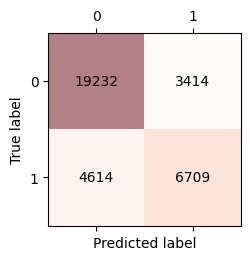

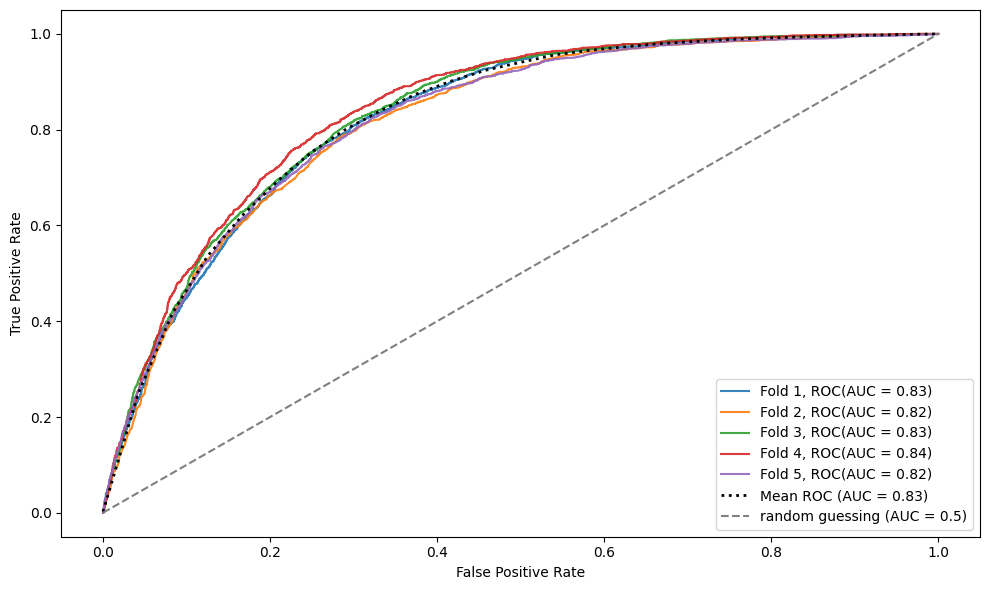

Mean AUC : 0.83
Mean f1_score (macro): 0.73


In [71]:
# Weak model
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=seed)
# Adaboost w/ Decision Trees
clf = AdaBoostClassifier(estimator=model, n_estimators=50, random_state=seed, algorithm='SAMME')
training_evaluation_figures(clf, X_train_sample,y_train_sample, savefig=True, num_fig=11)

\begin{tabular}{lrrrr}
\toprule
 & precision & recall & f1-score & support \\
\midrule
0 & 0.950 & 0.904 & 0.926 & 26916.000 \\
1 & 0.309 & 0.478 & 0.375 & 2427.000 \\
accuracy & 0.868 & NaN & NaN & NaN \\
macro avg & 0.630 & 0.691 & 0.651 & 29343.000 \\
weighted avg & 0.897 & 0.868 & 0.881 & 29343.000 \\
\bottomrule
\end{tabular}

              precision  recall  f1-score  support
0                 0.950   0.904     0.926  26916.0
1                 0.309   0.478     0.375   2427.0
accuracy          0.868     NaN       NaN      NaN
macro avg         0.630   0.691     0.651  29343.0
weighted avg      0.897   0.868     0.881  29343.0
Validation specificity (0) : 0.904
Validation sensitivity (1) : 0.478
\begin{tabular}{lrrrr}
\toprule
 & precision & recall & f1-score & support \\
\midrule
0 & 0.951 & 0.905 & 0.928 & 26917.000 \\
1 & 0.314 & 0.482 & 0.380 & 2426.000 \\
accuracy & 0.870 & NaN & NaN & NaN \\
macro avg & 0.633 & 0.694 & 0.654 & 29343.000 \\
weighted avg & 0.898 & 0.870 & 0.88

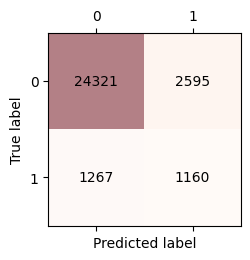

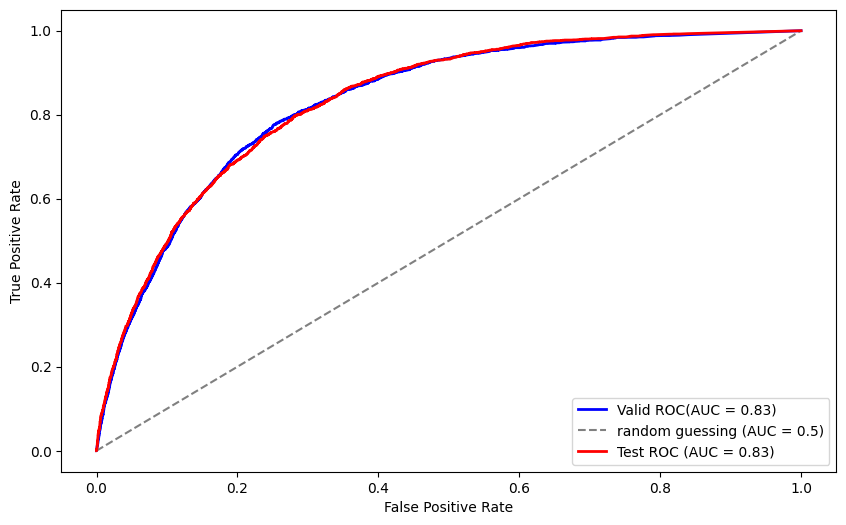

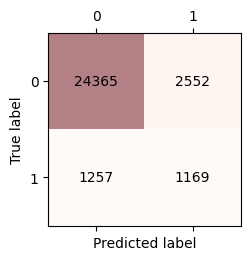

In [72]:
#Weal model
model = DecisionTreeClassifier(criterion='entropy',  max_depth=5, random_state=seed)
# Adaboost w/ Decision Trees
clf = AdaBoostClassifier(estimator=model, n_estimators=100, 
                         learning_rate=0.1, random_state=seed, algorithm='SAMME')

clf = clf.fit(X_train_sample, y_train_sample)
test_evaluation_figures(clf, X_valid_sample, y_valid_sample, X_test_sample,y_test_sample, 
                        savefig=True, num_fig=13)

### XgBoost 

\begin{tabular}{lrrrr}
\toprule
 & precision & recall & f1-score & support \\
\midrule
0 & 0.816 & 0.840 & 0.828 & 22646.000 \\
1 & 0.660 & 0.622 & 0.641 & 11323.000 \\
accuracy & 0.767 & NaN & NaN & NaN \\
macro avg & 0.738 & 0.731 & 0.734 & 33969.000 \\
weighted avg & 0.764 & 0.767 & 0.765 & 33969.000 \\
\bottomrule
\end{tabular}

              precision  recall  f1-score  support
0                 0.816   0.840     0.828  22646.0
1                 0.660   0.622     0.641  11323.0
accuracy          0.767     NaN       NaN      NaN
macro avg         0.738   0.731     0.734  33969.0
weighted avg      0.764   0.767     0.765  33969.0
Training specificity (0) : 0.840
Training sensitivity (1) : 0.622


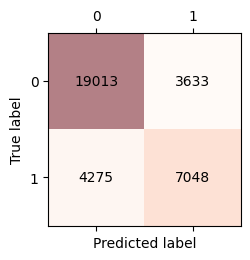

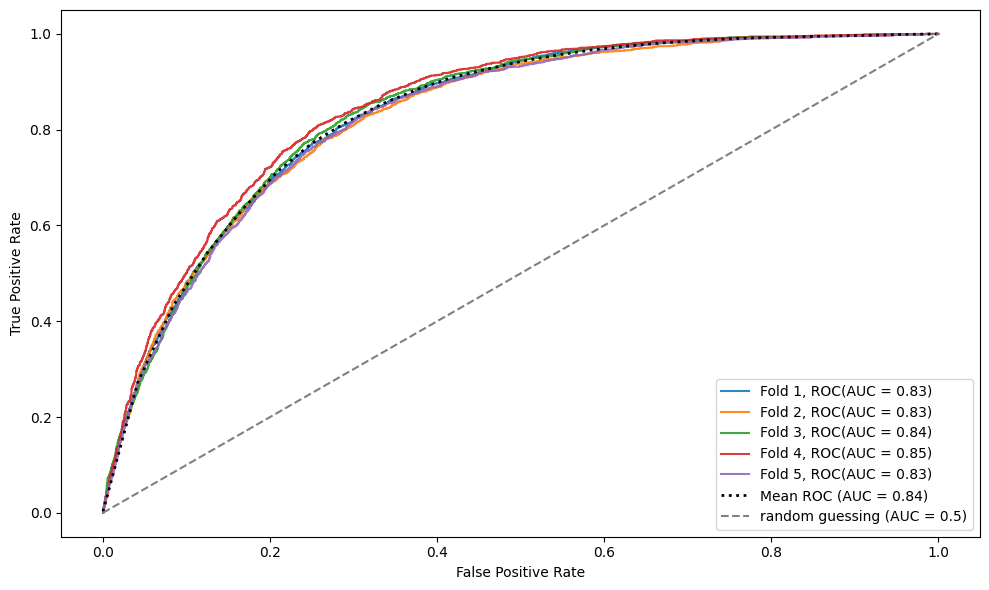

Mean AUC : 0.84
Mean f1_score (macro): 0.73


In [73]:
# XGBoost with default configuration
clf = xgb.XGBClassifier(n_estimators=50, max_depth=6,  subsample=1, 
                        colsample_bytree=1, learning_rate=0.3, random_state=seed)
training_evaluation_figures(clf, X_train_sample,y_train_sample, savefig=True, num_fig=16)

\begin{tabular}{lrrrr}
\toprule
 & precision & recall & f1-score & support \\
\midrule
0 & 0.954 & 0.888 & 0.920 & 26916.000 \\
1 & 0.299 & 0.531 & 0.382 & 2427.000 \\
accuracy & 0.858 & NaN & NaN & NaN \\
macro avg & 0.627 & 0.709 & 0.651 & 29343.000 \\
weighted avg & 0.900 & 0.858 & 0.875 & 29343.000 \\
\bottomrule
\end{tabular}

              precision  recall  f1-score  support
0                 0.954   0.888     0.920  26916.0
1                 0.299   0.531     0.382   2427.0
accuracy          0.858     NaN       NaN      NaN
macro avg         0.627   0.709     0.651  29343.0
weighted avg      0.900   0.858     0.875  29343.0
Validation specificity (0) : 0.888
Validation sensitivity (1) : 0.531
\begin{tabular}{lrrrr}
\toprule
 & precision & recall & f1-score & support \\
\midrule
0 & 0.954 & 0.887 & 0.919 & 26917.000 \\
1 & 0.297 & 0.529 & 0.380 & 2426.000 \\
accuracy & 0.857 & NaN & NaN & NaN \\
macro avg & 0.626 & 0.708 & 0.650 & 29343.000 \\
weighted avg & 0.900 & 0.857 & 0.87

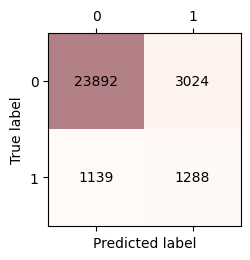

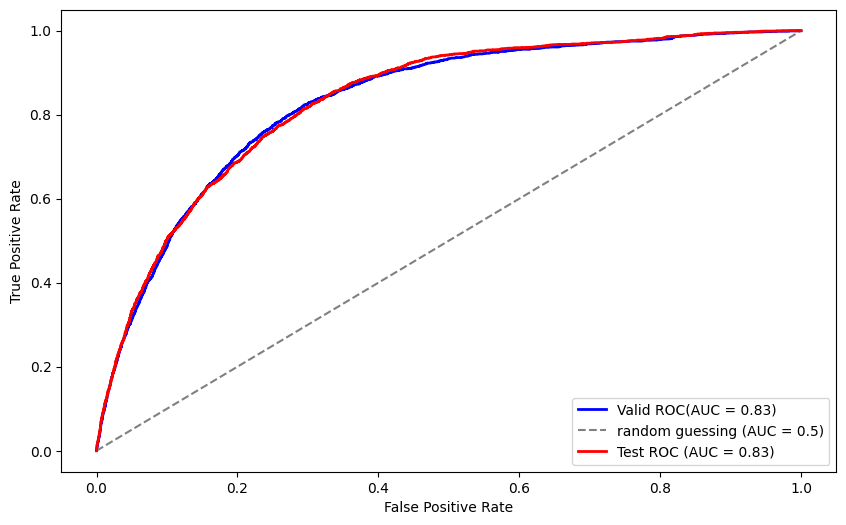

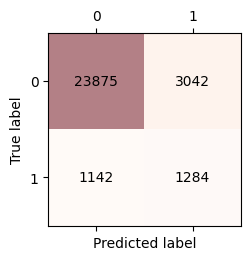

In [74]:
clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.02, max_depth=7, 
                        subsample=0.9, colsample_bytree=0.8, random_state=seed)
clf = clf.fit(X_train_sample, y_train_sample)
test_evaluation_figures(clf, X_valid_sample, y_valid_sample, X_test_sample,y_test_sample, 
                        savefig=True, num_fig=18)

### Decision Trees

\begin{tabular}{lrrrr}
\toprule
 & precision & recall & f1-score & support \\
\midrule
0 & 0.787 & 0.880 & 0.831 & 22646.000 \\
1 & 0.685 & 0.522 & 0.593 & 11323.000 \\
accuracy & 0.761 & NaN & NaN & NaN \\
macro avg & 0.736 & 0.701 & 0.712 & 33969.000 \\
weighted avg & 0.753 & 0.761 & 0.751 & 33969.000 \\
\bottomrule
\end{tabular}

              precision  recall  f1-score  support
0                 0.787   0.880     0.831  22646.0
1                 0.685   0.522     0.593  11323.0
accuracy          0.761     NaN       NaN      NaN
macro avg         0.736   0.701     0.712  33969.0
weighted avg      0.753   0.761     0.751  33969.0
Training specificity (0) : 0.880
Training sensitivity (1) : 0.522


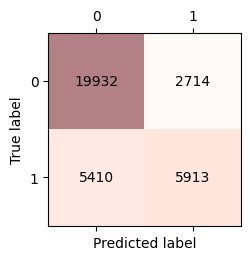

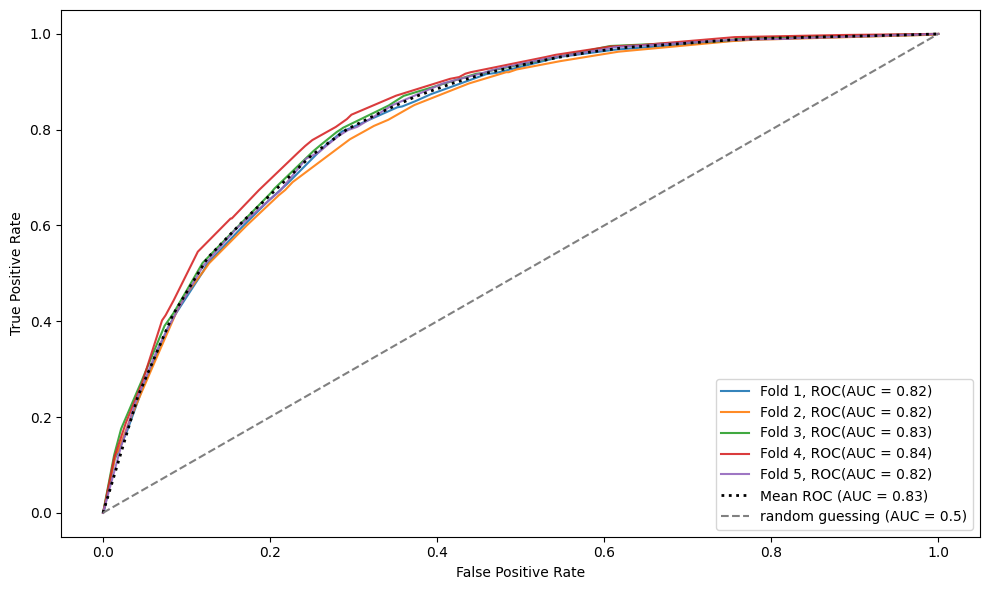

Mean AUC : 0.83
Mean f1_score (macro): 0.71


In [75]:
# Decision Trees trainig stage
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=seed)
training_evaluation_figures(clf, X_train_sample,y_train_sample, savefig=True, num_fig=21)

\begin{tabular}{lrrrr}
\toprule
 & precision & recall & f1-score & support \\
\midrule
0 & 0.963 & 0.818 & 0.885 & 26916.000 \\
1 & 0.244 & 0.652 & 0.355 & 2427.000 \\
accuracy & 0.804 & NaN & NaN & NaN \\
macro avg & 0.604 & 0.735 & 0.620 & 29343.000 \\
weighted avg & 0.904 & 0.804 & 0.841 & 29343.000 \\
\bottomrule
\end{tabular}

              precision  recall  f1-score  support
0                 0.963   0.818     0.885  26916.0
1                 0.244   0.652     0.355   2427.0
accuracy          0.804     NaN       NaN      NaN
macro avg         0.604   0.735     0.620  29343.0
weighted avg      0.904   0.804     0.841  29343.0
Validation specificity (0) : 0.818
Validation sensitivity (1) : 0.652
\begin{tabular}{lrrrr}
\toprule
 & precision & recall & f1-score & support \\
\midrule
0 & 0.963 & 0.816 & 0.884 & 26917.000 \\
1 & 0.243 & 0.654 & 0.354 & 2426.000 \\
accuracy & 0.803 & NaN & NaN & NaN \\
macro avg & 0.603 & 0.735 & 0.619 & 29343.000 \\
weighted avg & 0.904 & 0.803 & 0.84

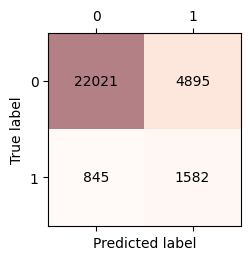

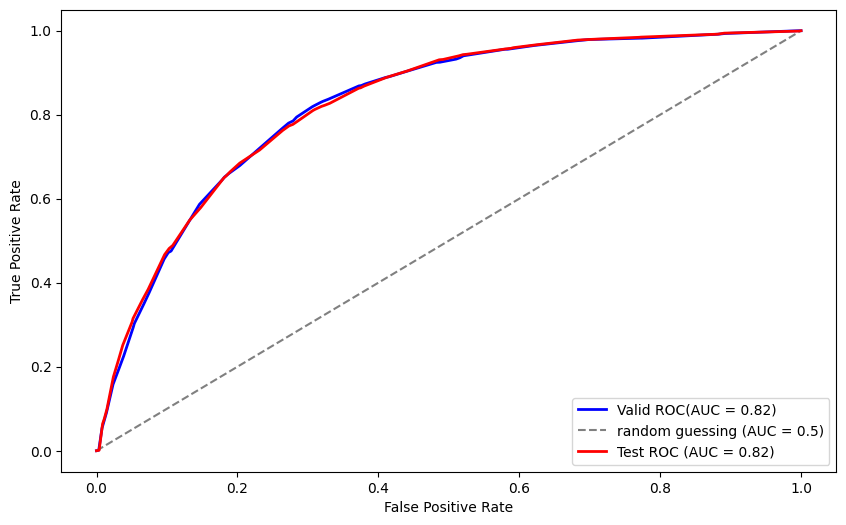

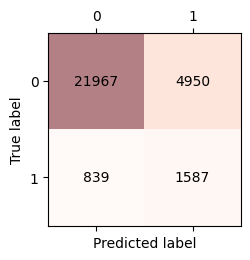

In [76]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=seed)
clf = clf.fit(X_train_sample, y_train_sample)
test_evaluation_figures(clf, X_valid_sample, y_valid_sample, X_test_sample,y_test_sample, 
                        savefig=True, num_fig=23)

### KNN

\begin{tabular}{lrrrr}
\toprule
 & precision & recall & f1-score & support \\
\midrule
0 & 0.792 & 0.825 & 0.808 & 22646.000 \\
1 & 0.618 & 0.566 & 0.591 & 11323.000 \\
accuracy & 0.739 & NaN & NaN & NaN \\
macro avg & 0.705 & 0.696 & 0.699 & 33969.000 \\
weighted avg & 0.734 & 0.739 & 0.736 & 33969.000 \\
\bottomrule
\end{tabular}

              precision  recall  f1-score  support
0                 0.792   0.825     0.808  22646.0
1                 0.618   0.566     0.591  11323.0
accuracy          0.739     NaN       NaN      NaN
macro avg         0.705   0.696     0.699  33969.0
weighted avg      0.734   0.739     0.736  33969.0
Training specificity (0) : 0.825
Training sensitivity (1) : 0.566


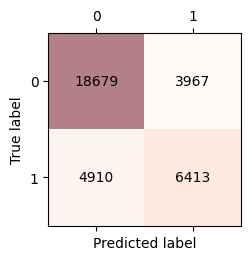

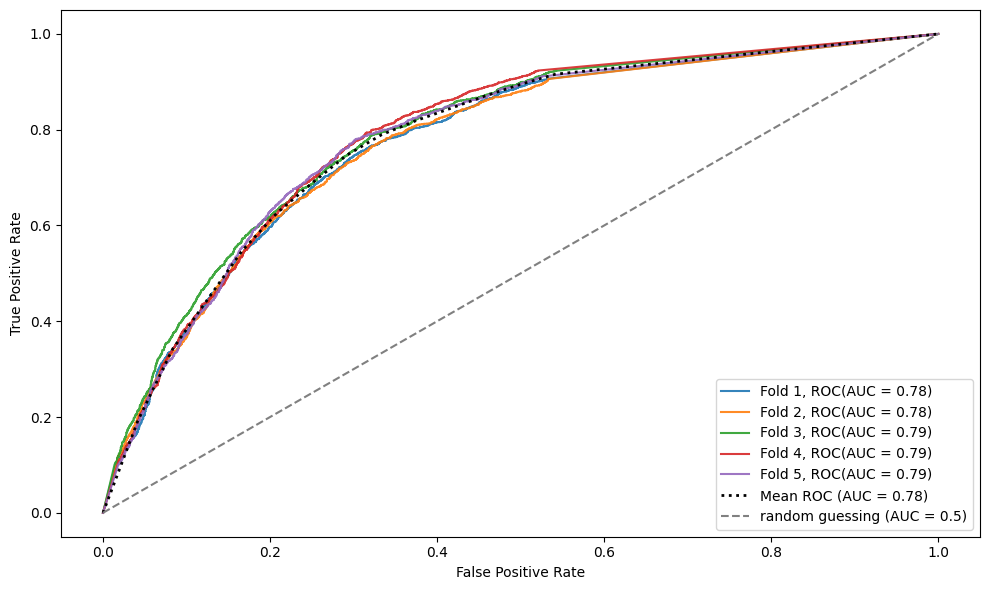

Mean AUC : 0.78
Mean f1_score (macro): 0.70


In [77]:
# KNN training stage
clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2, weights = 'distance')
training_evaluation_figures(clf, X_train_sample,y_train_sample, savefig=True, num_fig=26)

\begin{tabular}{lrrrr}
\toprule
 & precision & recall & f1-score & support \\
\midrule
0 & 0.971 & 0.544 & 0.697 & 26916.000 \\
1 & 0.140 & 0.823 & 0.239 & 2427.000 \\
accuracy & 0.567 & NaN & NaN & NaN \\
macro avg & 0.556 & 0.683 & 0.468 & 29343.000 \\
weighted avg & 0.903 & 0.567 & 0.660 & 29343.000 \\
\bottomrule
\end{tabular}

              precision  recall  f1-score  support
0                 0.971   0.544     0.697  26916.0
1                 0.140   0.823     0.239   2427.0
accuracy          0.567     NaN       NaN      NaN
macro avg         0.556   0.683     0.468  29343.0
weighted avg      0.903   0.567     0.660  29343.0
Validation specificity (0) : 0.544
Validation sensitivity (1) : 0.823
\begin{tabular}{lrrrr}
\toprule
 & precision & recall & f1-score & support \\
\midrule
0 & 0.971 & 0.537 & 0.692 & 26917.000 \\
1 & 0.138 & 0.822 & 0.236 & 2426.000 \\
accuracy & 0.561 & NaN & NaN & NaN \\
macro avg & 0.554 & 0.679 & 0.464 & 29343.000 \\
weighted avg & 0.902 & 0.561 & 0.65

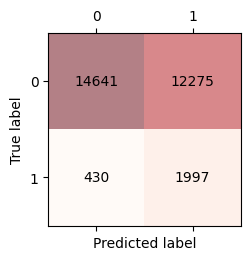

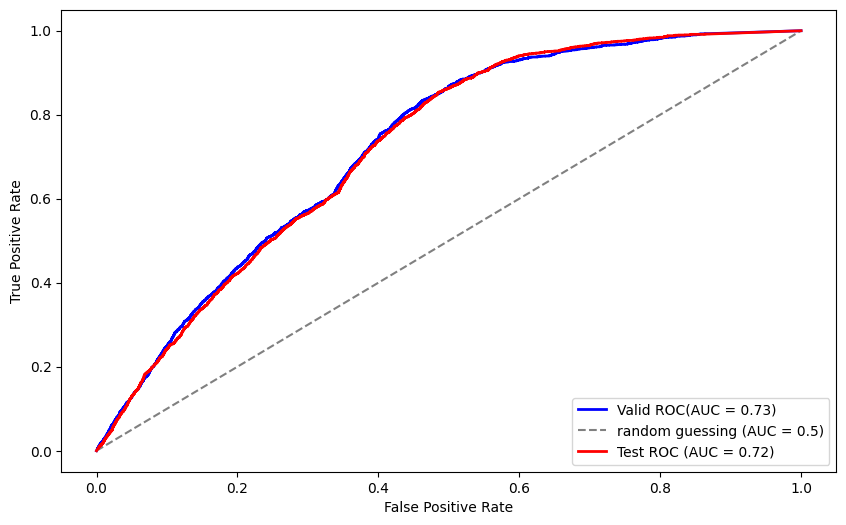

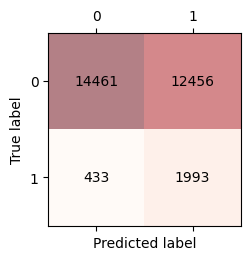

In [78]:
clf = KNeighborsClassifier(n_neighbors=6, metric='minkowski', p=2, weights = 'distance')
clf = clf.fit(X_train_sample, y_train_sample)
test_evaluation_figures(clf, X_valid_sample, y_valid_sample, X_test_sample,y_test_sample, 
                        savefig=True, num_fig=28)

# 7. RESULTS

In [79]:
# Use most important feature variables labels from Random Forest method application
results_feat_labels  = new_feat_labels.drop(['Height_(cm)', 'Weight_(kg)']) 
results_numeric_cols = [] # numeric cols
results_categoric_cols = [] # categorial cols
for col in results_feat_labels:
    if (col == numeric_cols).any():
        results_numeric_cols.append(col)
    else:
        results_categoric_cols.append(col)

In [80]:
model = DecisionTreeClassifier(criterion='entropy',  max_depth=5, random_state=seed)
# Adaboost w/ Decision Trees
clf = AdaBoostClassifier(estimator=model, n_estimators=100, 
                         learning_rate=0.1, random_state=seed, algorithm='SAMME')
clf.fit(X_train_sample, y_train_sample)
# Predict probabilities
probabilities = clf.predict_proba(X_test_sample)[:, 1]  # positive class probabilities
# Add a 'Probabilities' columns at the end of X_test_sample_df
X_test_sample_df['Probabilities'] = probabilities

X_test_sample_df['True_Label'] = y_test_sample

fpr, tpr, thresholds = roc_curve(y_test_sample, probabilities)
specificity = 1 - fpr
# Youden index (J)
youden_index = tpr + specificity - 1

best_threshold_roc = thresholds[np.argmax(youden_index)]

# Get original values
# Exercise and Sex are quite important in medical analysis
X_test_sample_df['Exercise'] = df_cleaned['Exercise'].iloc[X_test_sample_df.index].values
X_test_sample_df['Sex'] = df_cleaned['Sex'].iloc[X_test_sample_df.index].values

for col in new_feat_labels:
    X_test_sample_df[col] = df_cleaned[col].iloc[X_test_sample_df.index].values

In [81]:
def results_proba_plot(kind, col_labels, data, threshold, savefig=False, num_fig=1):
    ''' 
    Auxiliar function
    Print in console different plots from the given data to analyze later
    '''
    get_kind = {'barplot': sns.barplot,'scatterplot': sns.scatterplot}
    for col in col_labels:
        plt.figure(figsize=(10, 4))
        averages = data.groupby(col)['Probabilities'].mean().reset_index()
        get_kind[kind](
        data= averages,
        x=col,
        y='Probabilities',
        color= 'red', 
        alpha=0.9
        )
        plt.title(f"Heart Disease Probability Prediction ({col})", fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel("Average probability", fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.ylim(0, averages['Probabilities'].max()+0.02)  # Escala de probabilidad
        plt.axhline(y=threshold, color="k", linestyle="--", 
                    label=f"Decision Threshold ({threshold:.3f})")
        plt.legend()
        if savefig:
            # Save image
            name = f'figura00{num_fig}.png'
            file_name = f"{name}"
            plt.savefig(file_name, dpi=300, format='png', bbox_inches="tight")
            num_fig += 1

    plt.show()

C:\Users\MyLENOVO\AppData\Local\Temp\ipykernel_9612\1941134109.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  averages = data.groupby(col)['Probabilities'].mean().reset_index()


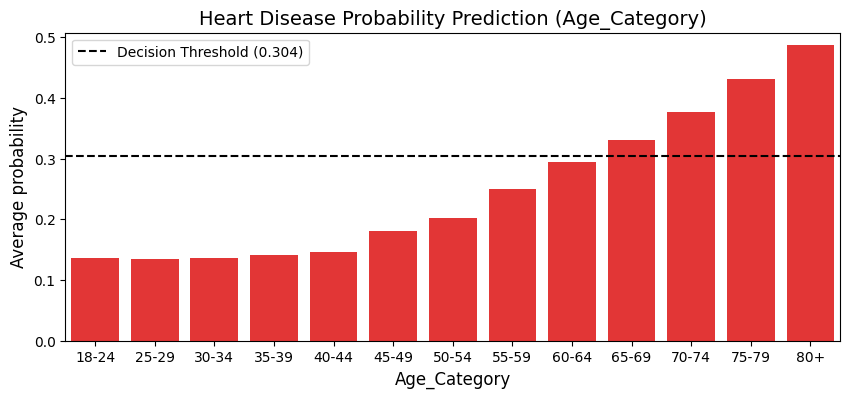

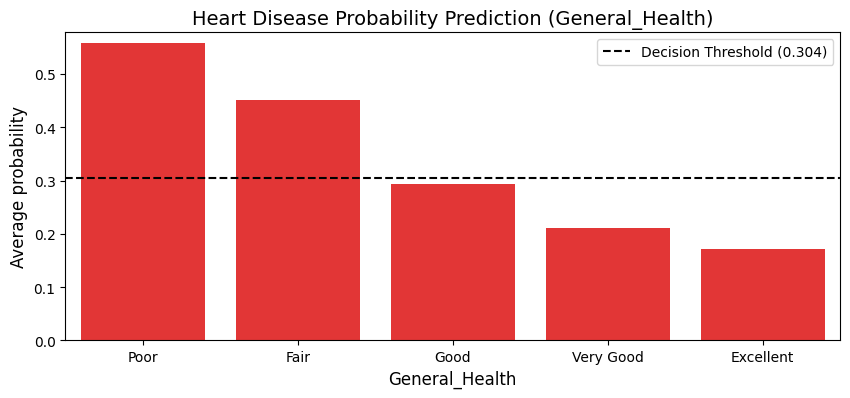

In [82]:
results_proba_plot('barplot', results_categoric_cols, X_test_sample_df, best_threshold_roc,
                   savefig=True,num_fig=32)


C:\Users\MyLENOVO\AppData\Local\Temp\ipykernel_9612\2903245733.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_prob_by_bmi_bin = X_test_sample_df.groupby('BMI_bin')['Probabilities'].mean()


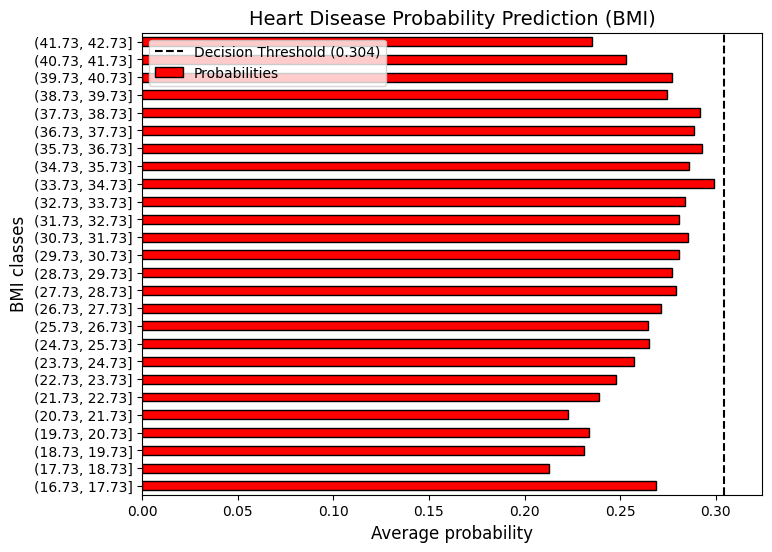

In [83]:
# Plotting probability predictions by BMI intervals
min_ = X_test_sample_df['BMI'].min()
max_ = X_test_sample_df['BMI'].max()
bins = np.arange(min_, max_, 1)  # Divide BMI range into many intervals as many as we required

# Assign to every value its corresponding BMI interval
X_test_sample_df['BMI_bin'] = pd.cut(X_test_sample_df['BMI'], bins)

# Average BMI interval 
avg_prob_by_bmi_bin = X_test_sample_df.groupby('BMI_bin')['Probabilities'].mean()

# Plot results
plt.figure(figsize=(8, 6))
avg_prob_by_bmi_bin.plot(kind='barh', color='red', edgecolor='black')
plt.axvline(x=best_threshold_roc, color="k", linestyle="--", label=f"Decision Threshold ({best_threshold_roc:.3f})")

# Image config
plt.title(f"Heart Disease Probability Prediction (BMI)", fontsize=14)
plt.ylabel('BMI classes', fontsize=12)
plt.xlabel("Average probability", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(0, best_threshold_roc + 0.02)
plt.legend()

# Save image
name = f'figura00{34}.png'
file_name = f"{name}"
plt.savefig(file_name, dpi=300, format='png', bbox_inches="tight")

plt.show()

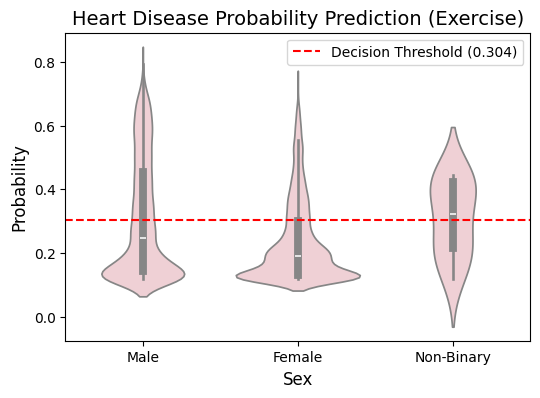

In [84]:
plt.figure(figsize=(6, 4))
sns.violinplot(data=X_test_sample_df, x='Sex', y='Probabilities', color='pink', saturation=0.5)
plt.axhline(y=best_threshold_roc, color="red", linestyle="--", label=f"Decision Threshold ({best_threshold_roc:.3f})")

# Image config
plt.title(f"Heart Disease Probability Prediction (Exercise)", fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel("Probability", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
# Save image
name = f'figura00{31}.png'
file_name = f"{name}"
plt.savefig(file_name, dpi=300, format='png', bbox_inches="tight")

plt.show()

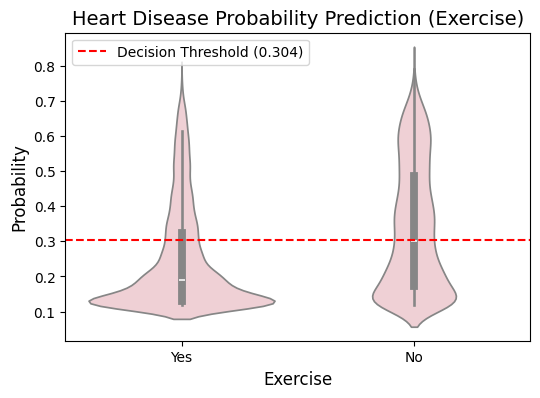

In [85]:
plt.figure(figsize=(6, 4))
sns.violinplot(data=X_test_sample_df, x='Exercise', y='Probabilities', color='pink', saturation=0.5)
plt.axhline(y=best_threshold_roc, color="red", linestyle="--", label=f"Decision Threshold ({best_threshold_roc:.3f})")

# Image config
plt.title(f"Heart Disease Probability Prediction (Exercise)", fontsize=14)
plt.xlabel('Exercise', fontsize=12)
plt.ylabel("Probability", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
# Save image
name = f'figura00{35}.png'
file_name = f"{name}"
plt.savefig(file_name, dpi=300, format='png', bbox_inches="tight")

plt.show()

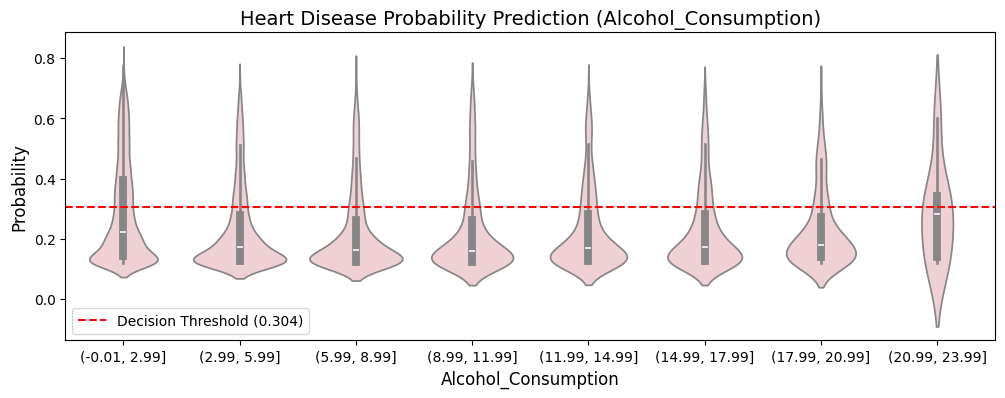

In [86]:
plt.figure(figsize=(12, 4))
min_ = X_test_sample_df['Alcohol_Consumption'].min()
max_ = X_test_sample_df['Alcohol_Consumption'].max()

bins = np.arange(min_-0.01, max_ +0.01, 3)  


X_test_sample_df['Alcohol_bin'] = pd.cut(X_test_sample_df['Alcohol_Consumption'], bins)
sns.violinplot(data=X_test_sample_df, x='Alcohol_bin', y='Probabilities', color='pink', saturation=0.5)
plt.axhline(y=best_threshold_roc, color="red", linestyle="--", label=f"Decision Threshold ({best_threshold_roc:.3f})")

# Image config
plt.title(f"Heart Disease Probability Prediction (Alcohol_Consumption)", fontsize=14)
plt.xlabel('Alcohol_Consumption', fontsize=12)
plt.ylabel("Probability", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()

# Save image
name = f'figura00{36}.png'
file_name = f"{name}"
plt.savefig(file_name, dpi=300, format='png', bbox_inches="tight")

plt.show()

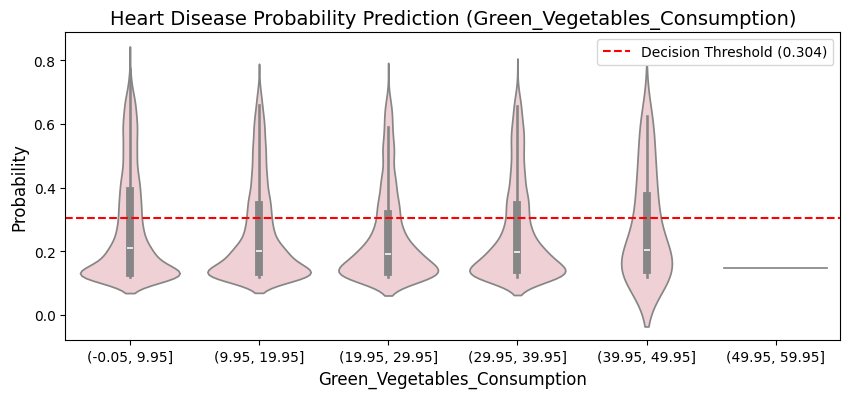

In [87]:
plt.figure(figsize=(10, 4))
min_ = X_test_sample_df['Green_Vegetables_Consumption'].min()
max_ = X_test_sample_df['Green_Vegetables_Consumption'].max()

bins = np.arange(min_-0.05, max_, 10)  


X_test_sample_df['Green_Vegetables_Consumption_bin'] = pd.cut(X_test_sample_df['Green_Vegetables_Consumption'], bins)
sns.violinplot(data=X_test_sample_df, x='Green_Vegetables_Consumption_bin', y='Probabilities', color='pink', saturation=0.5)
plt.axhline(y=best_threshold_roc, color="red", linestyle="--", label=f"Decision Threshold ({best_threshold_roc:.3f})")

# Image config
plt.title(f"Heart Disease Probability Prediction (Green_Vegetables_Consumption)", fontsize=14)
plt.xlabel('Green_Vegetables_Consumption', fontsize=12)
plt.ylabel("Probability", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()

# Save image
name = f'figura00{37}.png'
file_name = f"{name}"
plt.savefig(file_name, dpi=300, format='png', bbox_inches="tight")


plt.show()

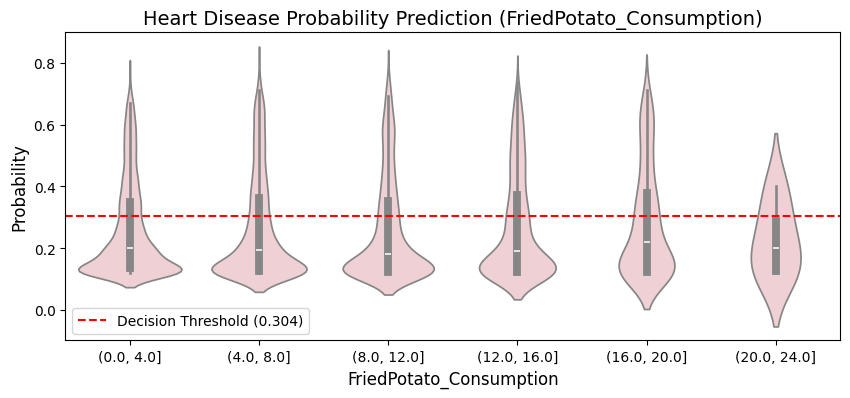

In [88]:
plt.figure(figsize=(10, 4))
min_ = X_test_sample_df['FriedPotato_Consumption'].min()
max_ = X_test_sample_df['FriedPotato_Consumption'].max()

bins = np.arange(min_, max_+0.05, 4)  


X_test_sample_df['FriedPotato_Consumption_bin'] = pd.cut(X_test_sample_df['FriedPotato_Consumption'], bins)
sns.violinplot(data=X_test_sample_df, x='FriedPotato_Consumption_bin', y='Probabilities', color='pink', saturation=0.5)
plt.axhline(y=best_threshold_roc, color="red", linestyle="--", label=f"Decision Threshold ({best_threshold_roc:.3f})")

# Image config
plt.title(f"Heart Disease Probability Prediction (FriedPotato_Consumption)", fontsize=14)
plt.xlabel('FriedPotato_Consumption', fontsize=12)
plt.ylabel("Probability", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()

# Save image
name = f'figura00{38}.png'
file_name = f"{name}"
plt.savefig(file_name, dpi=300, format='png', bbox_inches="tight")


plt.show()

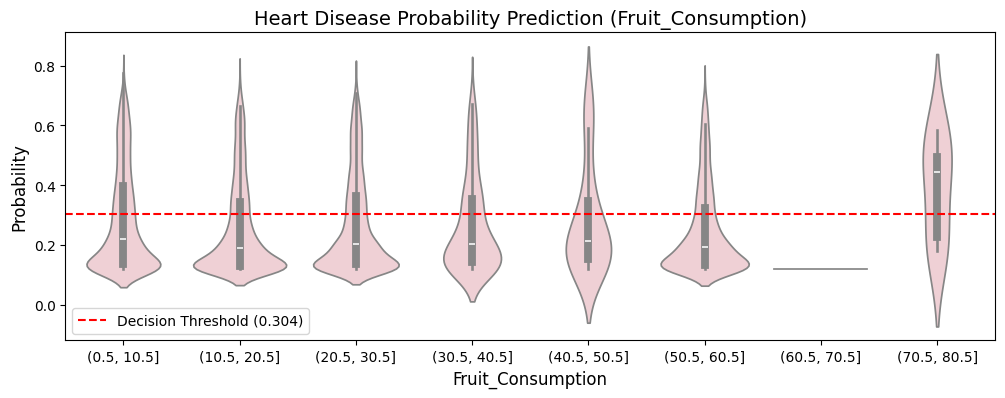

In [89]:
plt.figure(figsize=(12, 4))
min_ = X_test_sample_df['Fruit_Consumption'].min()
max_ = X_test_sample_df['Fruit_Consumption'].max()

bins = np.arange(min_+0.5, max_+0.5, 10)  


X_test_sample_df['Fruit_Consumption_bin'] = pd.cut(X_test_sample_df['Fruit_Consumption'], bins)
sns.violinplot(data=X_test_sample_df, x='Fruit_Consumption_bin', y='Probabilities', color='pink', saturation=0.5)
plt.axhline(y=best_threshold_roc, color="red", linestyle="--", label=f"Decision Threshold ({best_threshold_roc:.3f})")

# Image config
plt.title(f"Heart Disease Probability Prediction (Fruit_Consumption)", fontsize=14)
plt.xlabel('Fruit_Consumption', fontsize=12)
plt.ylabel("Probability", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()

# Save image
name = f'figura00{39}.png'
file_name = f"{name}"
plt.savefig(file_name, dpi=300, format='png', bbox_inches="tight")


plt.show()